
## Time Series GPTs

* Time series data 



## Libraries


In [1]:

## !pip install xgboost
## !pip install matplotlib
## !pip install scikit-learn
## !pip install einops
## !pip install similaritymeasures
## !pip install numba
## !pip install cudatoolkit
## !pip install mlxtend


In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable
import torch
## torch.set_float32_matmul_precision('medium')
import sklearn
import random
import math
from sklearn.model_selection import train_test_split
from torch.utils.data import TensorDataset, DataLoader
## coefficient of determination 
from sklearn.metrics import r2_score
from einops import rearrange
from math import sqrt, log
from datetime import datetime
import similaritymeasures
from sdtw_cuda_loss import SoftDTW
from mlxtend.plotting import heatmap
import mlxtend


In [3]:

import tsGPT_tk as tsGPT
import tsDataWrangling as tsDataWrangling
import Time_Series_GPT as Time_Series_GPT
import inferenceGPT as inferenceGPT



## Instantiate


In [4]:

tsGPT_obj           = tsGPT.ParamsGPT()
tsDataWrangling_obj = tsDataWrangling.tsDataWrangling()
inferenceGPT_obj    = inferenceGPT.inferenceGPT()



## Step 1 - Data Wrangling


In [5]:

tsDataWrangling_obj.step1_wrangle()

tsDataWrangling_obj.FOUR_files_merged_data_rc


0
50000
100000
150000
200000
250000


Timestamp_f1      MM_Timestamp_f1  THEORETICAL_TONNAGE_f3  \
0       2021-08-01 01:23:00  2021-08-01 00:00:00                    6006   
1       2021-08-01 01:23:00  2021-08-01 00:01:00                    6006   
2       2021-08-01 01:23:00  2021-08-01 00:02:00                    6006   
3       2021-08-01 01:23:00  2021-08-01 00:03:00                    6006   
4       2021-08-01 01:23:00  2021-08-01 00:04:00                    6006   
...                     ...                  ...                     ...   
266211  2022-01-31 22:16:00  2022-01-31 22:12:00                    6322   
266212  2022-01-31 22:16:00  2022-01-31 22:13:00                    6322   
266213  2022-01-31 22:16:00  2022-01-31 22:14:00                    6322   
266214  2022-01-31 22:16:00  2022-01-31 22:15:00                    6322   
266215  2022-01-31 22:16:00  2022-01-31 22:16:00                    6322   

        Coke_Rate_f3  HOT_BLAST_TMP_NS_f3  WINDRATE_f3  \
0                992          1999.604384   179.749638   
1                992          2000.288837   179.765945   
2                992          1999.242862   179.782251   
3                992          1999.884442   179.798490   
4                992          1999.849729   179.784430   
...              ...                  ...          ...   
266211           924          2167.603916   189.029098   
266212           924          2167.404841   188.892415   
266213           924          2167.205766   188.689857   
266214           924          2167.006691   188.610793   
266215           924          2166.807617   188.621779   

        SNORT_VALVE_POSITION_f3  COLD_BLAST_MOISTURE_f3  \
0                     98.334297                4.997585   
1                     98.334297                5.000531   
2                     98.334297                5.003476   
3                     98.334297                5.006422   
4                     98.334297                5.009368   
...                         ...                     ...   
266211                98.334297                1.151288   
266212                98.334297                1.151910   
266213                98.334297                1.152533   
266214                98.334297                1.153156   
266215                98.334297                1.153779   

        HOST_BLAST_MOISTURE_f3  HIGH_PURITY_OXYGEN_f3  COAL_FLOW_f3  \
0                     8.084517               2.510680           0.0   
1                     8.079545               2.489381           0.0   
2                     8.074573               2.489037           0.0   
3                     8.069602               2.496867           0.0   
4                     8.064630               2.501961           0.0   
...                        ...                    ...           ...   
266211                5.105940               0.000000           0.0   
266212                5.110442               0.000000           0.0   
266213                5.114944               0.000000           0.0   
266214                5.119446               0.000000           0.0   
266215                5.123948               0.000000           0.0   

        NAT_GAS _INJECTION_f3  HOT_BLAST_PRESSURE_f3  TOP_PRESS_f3  \
0                 4034.234339              34.357590     17.398326   
1                 4024.947376              34.328821     17.483486   
2                 4011.601682              34.300052     17.260358   
3                 4012.024633              34.271282     17.212606   
4                 4000.467204              34.242513     17.405035   
...                       ...                    ...           ...   
266211           10497.271240              35.644868     18.695292   
266212           10524.821170              35.648894     17.985995   
266213           10520.260680              35.635697     18.707857   
266214           10518.901880              35.621174     18.198216   
266215           10612.610090              35.602023     18.338861   

  


## Step 2 - Data Wrangling


In [6]:

tsDataWrangling_obj.step2_wrangle()


In [7]:

tsDataWrangling_obj.df_res_shifted 


SI_f1  HOST_BLAST_MOISTURE_f3  HOT_BLAST_TMP_NS_f3  \
1     0.719500                4.242439          2161.425209   
2     0.710486                4.174343          2168.238915   
3     0.666106                4.126144          2167.779119   
4     0.675145                4.120736          2166.974740   
5     0.776831                4.120331          2166.384674   
...        ...                     ...                  ...   
1390  0.762500                4.204430          2169.361647   
1391  0.646000                4.208539          2169.079601   
1392  0.654667                4.212648          2168.797556   
1393  0.591667                4.217784          2168.444999   
1394  0.724667                4.223948          2167.967389   

      NAT_GAS _INJECTION_f3  WINDRATE_f3  HIGH_PURITY_OXYGEN_f3  COAL_FLOW_f3  \
1               9306.840913   184.818611                    0.0           0.0   
2               9336.364456   185.993447                    0.0           0.0   
3               9419.200115   185.828474                    0.0           0.0   
4               9564.165802   185.924481                    0.0           0.0   
5               9648.247637   185.942943                    0.0           0.0   
...                     ...          ...                    ...           ...   
1390            9297.484543   185.046491                    0.0           0.0   
1391            9312.779010   185.053796                    0.0           0.0   
1392            9303.753420   185.007919                    0.0           0.0   
1393            9333.448101   184.942435                    0.0           0.0   
1394            9321.819731   184.863855                    0.0           0.0   

      Cast_Avg_Mn_f2  Slag_Fe_f2  date_f1    CNUM     LNUM_f1  \
1              0.354        0.16  44562.0     2.0  168.666667   
2              0.313        0.83  44562.0     6.0  137.450000   
3              0.360        0.10  44562.0     7.0  156.684211   
4              0.319        0.34  44562.0     8.0  150.869919   
5              0.335        0.28  44562.0     9.0  160.218182   
...              ...         ...      ...     ...         ...   
1390           0.343        0.30  44561.0  4344.0  147.500000   
1391           0.324        0.30  44561.0  4345.0  147.500000   
1392           0.325        0.16  44561.0  4346.0  174.000000   
1393           0.335        0.26  44561.0  4347.0  160.000000   
1394           0.328        1.08  44561.0  4348.0  149.333333   

      Selec_Top_Gas_CO_f3  Selec_Top_Gas_CO2_f3  Selec_Top_Gas_H2_f3  \
1               21.080431             18.313322             4.131228   
2               20.996415             18.311768             4.133911   
3               20.749627             18.341701             4.137632   
4               20.609259             18.644476             4.142824   
5               20.617383             18.845791             4.220690   
...                   ...                   ...                  ...   
1390            21.039583             18.308225             4.129485   
1391            21.043999             18.308776             4.129674   
1392            21.048415             18.309327             4.129862   
1393            21.053935             18.310016             4.130097   
1394            21.060559             18.310842             4.130380   

      Selec_Top_Gas_N2_f3  NE_Uptake_f3  SE_Uptake_f3  NW_Uptake_f3  \
1               54.940123    171.769513    182.533770    148.126483   
2               55.072779    170.595469    183.725050    148.161842   
3               55.375043    167.017421    195.812061    147.562523   
4               55.341884    154.214917    188.028883    147.807509   
5               55.284451    156.234542    200.141261    149.014319   
...                   ...           ...           ...           ...   
1390            55.162782    167.619915    185.900341    148.103530   
1391            55.162767    164.706552    182.408576    148.1060

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1394 entries, 1 to 1394
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   SI_f1                    1394 non-null   float64
 1   HOST_BLAST_MOISTURE_f3   1394 non-null   float64
 2   HOT_BLAST_TMP_NS_f3      1394 non-null   float64
 3   NAT_GAS _INJECTION_f3    1394 non-null   float64
 4   WINDRATE_f3              1394 non-null   float64
 5   HIGH_PURITY_OXYGEN_f3    1394 non-null   float64
 6   COAL_FLOW_f3             1394 non-null   float64
 7   Cast_Avg_Mn_f2           1394 non-null   float64
 8   Slag_Fe_f2               1394 non-null   float64
 9   date_f1                  1394 non-null   float64
 10  CNUM                     1394 non-null   float64
 11  LNUM_f1                  1394 non-null   float64
 12  Selec_Top_Gas_CO_f3      1394 non-null   float64
 13  Selec_Top_Gas_CO2_f3     1394 non-null   float64
 14  Selec_Top_Gas_H2_f3     

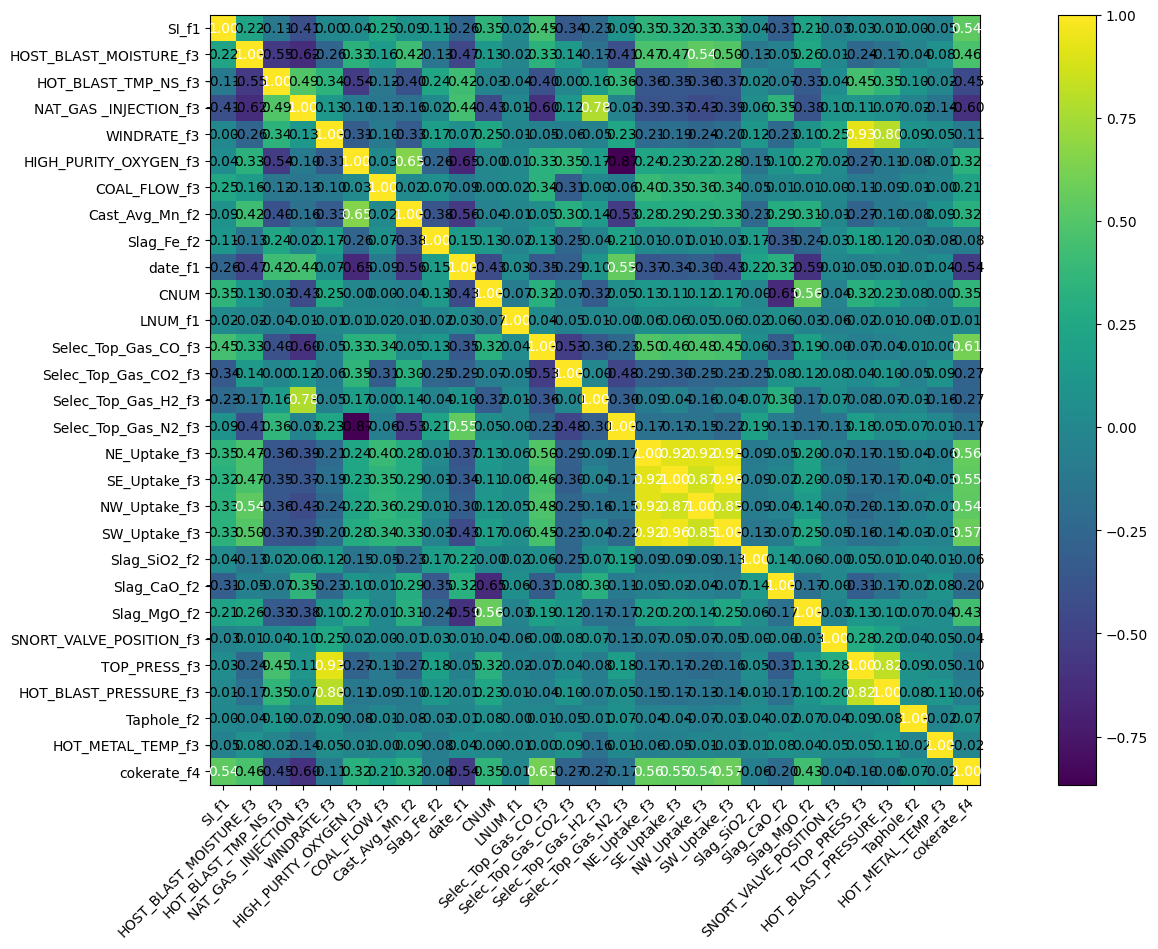

In [8]:

tsDataWrangling_obj.step2_simpler_plot_correlation_matrix(  tsDataWrangling_obj.df_res_shifted    )


In [9]:

tsDataWrangling_obj.dates_df_res_shifted


SI_f1             Date_Map  HOST_BLAST_MOISTURE_f3  \
1     0.719500  2022-01-01 00:45:00                4.242439   
2     0.710486  2022-01-01 08:43:00                4.174343   
3     0.666106  2022-01-01 10:17:00                4.126144   
4     0.675145  2022-01-01 12:40:00                4.120736   
5     0.776831  2022-01-01 15:06:00                4.120331   
...        ...                  ...                     ...   
1390  0.762500  2021-12-31 13:10:00                4.204430   
1391  0.646000  2021-12-31 14:41:00                4.208539   
1392  0.654667  2021-12-31 16:15:00                4.212648   
1393  0.591667  2021-12-31 17:40:00                4.217784   
1394  0.724667  2021-12-31 19:31:00                4.223948   

      HOT_BLAST_TMP_NS_f3  NAT_GAS _INJECTION_f3  WINDRATE_f3  \
1             2161.425209            9306.840913   184.818611   
2             2168.238915            9336.364456   185.993447   
3             2167.779119            9419.200115   185.828474   
4             2166.974740            9564.165802   185.924481   
5             2166.384674            9648.247637   185.942943   
...                   ...                    ...          ...   
1390          2169.361647            9297.484543   185.046491   
1391          2169.079601            9312.779010   185.053796   
1392          2168.797556            9303.753420   185.007919   
1393          2168.444999            9333.448101   184.942435   
1394          2167.967389            9321.819731   184.863855   

      HIGH_PURITY_OXYGEN_f3  COAL_FLOW_f3  Cast_Avg_Mn_f2  Slag_Fe_f2  \
1                       0.0           0.0           0.354        0.16   
2                       0.0           0.0           0.313        0.83   
3                       0.0           0.0           0.360        0.10   
4                       0.0           0.0           0.319        0.34   
5                       0.0           0.0           0.335        0.28   
...                     ...           ...             ...         ...   
1390                    0.0           0.0           0.343        0.30   
1391                    0.0           0.0           0.324        0.30   
1392                    0.0           0.0           0.325        0.16   
1393                    0.0           0.0           0.335        0.26   
1394                    0.0           0.0           0.328        1.08   

      date_f1    CNUM     LNUM_f1  Selec_Top_Gas_CO_f3  Selec_Top_Gas_CO2_f3  \
1     44562.0     2.0  168.666667            21.080431             18.313322   
2     44562.0     6.0  137.450000            20.996415             18.311768   
3     44562.0     7.0  156.684211            20.749627             18.341701   
4     44562.0     8.0  150.869919            20.609259             18.644476   
5     44562.0     9.0  160.218182            20.617383             18.845791   
...       ...     ...         ...                  ...                   ...   
1390  44561.0  4344.0  147.500000            21.039583             18.308225   
1391  44561.0  4345.0  147.500000            21.043999             18.308776   
1392  44561.0  4346.0  174.000000            21.048415             18.309327   
1393  44561.0  4347.0  160.000000            21.053935             18.310016   
1394  44561.0  4348.0  149.333333            21.060559             18.310842   

      Selec_Top_Gas_H2_f3  Selec_Top_Gas_N2_f3  NE_Uptake_f3  SE_Uptake_f3  \
1                4.131228            54.940123    171.769513    182.533770   
2                4.133911            55.072779    170.595469    183.725050   
3                4.137632            55.375043    167.017421    195.812061   
4                4.142824            55.341884    154.214917    188.028883   
5                4.220690            55.284451    156.234542    200.141261   
...                   ...                  ...           ...           ...   
1390             4.129485            55.162782    167.619915    185.900341   
1391     


## Step 3 - Data Wrangling


In [10]:

tsDataWrangling_obj.step3_wrangle()


In [11]:

tsDataWrangling_obj.for_RNN_data_CIVS 


delta_SI  mov_avg_SI     SI_f1             Date_Map  \
0     0.000000    0.000000  0.719500  2022-01-01 00:45:00   
1     0.000000    0.000000  0.710486  2022-01-01 08:43:00   
2    -0.044380    0.000000  0.666106  2022-01-01 10:17:00   
3     0.009040    0.000000  0.675145  2022-01-01 12:40:00   
4     0.101686    0.000000  0.776831  2022-01-01 15:06:00   
...        ...         ...       ...                  ...   
1389  0.109500    0.004444  0.762500  2021-12-31 13:10:00   
1390 -0.116500    0.008900  0.646000  2021-12-31 14:41:00   
1391  0.008667   -0.037618  0.654667  2021-12-31 16:15:00   
1392 -0.063000   -0.014340  0.591667  2021-12-31 17:40:00   
1393  0.133000    0.011422  0.724667  2021-12-31 19:31:00   

      HOST_BLAST_MOISTURE_f3  HOT_BLAST_TMP_NS_f3  NAT_GAS _INJECTION_f3  \
0                   4.242439          2161.425209            9306.840913   
1                   4.174343          2168.238915            9336.364456   
2                   4.126144          2167.779119            9419.200115   
3                   4.120736          2166.974740            9564.165802   
4                   4.120331          2166.384674            9648.247637   
...                      ...                  ...                    ...   
1389                4.204430          2169.361647            9297.484543   
1390                4.208539          2169.079601            9312.779010   
1391                4.212648          2168.797556            9303.753420   
1392                4.217784          2168.444999            9333.448101   
1393                4.223948          2167.967389            9321.819731   

      WINDRATE_f3  HIGH_PURITY_OXYGEN_f3  sec  min  hour  day  month  year  \
0      184.818611                    0.0    0   45     0    1      1  2022   
1      185.993447                    0.0    0   43     8    1      1  2022   
2      185.828474                    0.0    0   17    10    1      1  2022   
3      185.924481                    0.0    0   40    12    1      1  2022   
4      185.942943                    0.0    0    6    15    1      1  2022   
...           ...                    ...  ...  ...   ...  ...    ...   ...   
1389   185.046491                    0.0    0   10    13   31     12  2021   
1390   185.053796                    0.0    0   41    14   31     12  2021   
1391   185.007919                    0.0    0   15    16   31     12  2021   
1392   184.942435                    0.0    0   40    17   31     12  2021   
1393   184.863855                    0.0    0   31    19   31     12  2021   

      COAL_FLOW_f3  Cast_Avg_Mn_f2  Slag_Fe_f2    CNUM  Selec_Top_Gas_CO_f3  \
0              0.0           0.354        0.16     2.0            21.080431   
1              0.0           0.313        0.83     6.0            20.996415   
2              0.0           0.360        0.10     7.0            20.749627   
3              0.0           0.319        0.34     8.0            20.609259   
4              0.0           0.335        0.28     9.0            20.617383   
...            ...             ...         ...     ...                  ...   
1389           0.0           0.343        0.30  4344.0            21.039583   
1390           0.0           0.324        0.30  4345.0            21.043999   
1391           0.0           0.325        0.16  4346.0            21.048415   
1392           0.0           0.335        0.26  4347.0            21.053935   
1393           0.0           0.328        1.08  4348.0            21.060559   

      Selec_Top_Gas_CO2_f3  Selec_Top_Gas_H2_f3  Selec_Top_Gas_N2_f3  \
0                18.313322             4.131228            54.940123   
1                18.311768             4.133911            55.072779   
2                18.341701             4.137632            55.375043   
3                18.644476             4.142824            55.341884   
4                18.845791             4.220690            55.284451   
...                    ...                

In [12]:

tsDataWrangling_obj.delta_for_RNN_data_CIVS 


delta_SI  mov_avg_SI     SI_f1             Date_Map  \
0     0.000000    0.000000  0.719500  2022-01-01 00:45:00   
1     0.000000    0.000000  0.710486  2022-01-01 08:43:00   
2    -0.044380    0.000000  0.666106  2022-01-01 10:17:00   
3     0.009040    0.000000  0.675145  2022-01-01 12:40:00   
4     0.101686    0.000000  0.776831  2022-01-01 15:06:00   
...        ...         ...       ...                  ...   
1389  0.109500    0.004444  0.762500  2021-12-31 13:10:00   
1390 -0.116500    0.008900  0.646000  2021-12-31 14:41:00   
1391  0.008667   -0.037618  0.654667  2021-12-31 16:15:00   
1392 -0.063000   -0.014340  0.591667  2021-12-31 17:40:00   
1393  0.133000    0.011422  0.724667  2021-12-31 19:31:00   

      HOST_BLAST_MOISTURE_f3  HOT_BLAST_TMP_NS_f3  NAT_GAS _INJECTION_f3  \
0                   4.242439          2161.425209            9306.840913   
1                   4.174343          2168.238915            9336.364456   
2                   4.126144          2167.779119            9419.200115   
3                   4.120736          2166.974740            9564.165802   
4                   4.120331          2166.384674            9648.247637   
...                      ...                  ...                    ...   
1389                4.204430          2169.361647            9297.484543   
1390                4.208539          2169.079601            9312.779010   
1391                4.212648          2168.797556            9303.753420   
1392                4.217784          2168.444999            9333.448101   
1393                4.223948          2167.967389            9321.819731   

      WINDRATE_f3  HIGH_PURITY_OXYGEN_f3  sec  min  hour  day  month  year  \
0      184.818611                    0.0    0   45     0    1      1  2022   
1      185.993447                    0.0    0   43     8    1      1  2022   
2      185.828474                    0.0    0   17    10    1      1  2022   
3      185.924481                    0.0    0   40    12    1      1  2022   
4      185.942943                    0.0    0    6    15    1      1  2022   
...           ...                    ...  ...  ...   ...  ...    ...   ...   
1389   185.046491                    0.0    0   10    13   31     12  2021   
1390   185.053796                    0.0    0   41    14   31     12  2021   
1391   185.007919                    0.0    0   15    16   31     12  2021   
1392   184.942435                    0.0    0   40    17   31     12  2021   
1393   184.863855                    0.0    0   31    19   31     12  2021   

      COAL_FLOW_f3  Cast_Avg_Mn_f2  Slag_Fe_f2    CNUM  Selec_Top_Gas_CO_f3  \
0              0.0           0.354        0.16     2.0            21.080431   
1              0.0           0.313        0.83     6.0            20.996415   
2              0.0           0.360        0.10     7.0            20.749627   
3              0.0           0.319        0.34     8.0            20.609259   
4              0.0           0.335        0.28     9.0            20.617383   
...            ...             ...         ...     ...                  ...   
1389           0.0           0.343        0.30  4344.0            21.039583   
1390           0.0           0.324        0.30  4345.0            21.043999   
1391           0.0           0.325        0.16  4346.0            21.048415   
1392           0.0           0.335        0.26  4347.0            21.053935   
1393           0.0           0.328        1.08  4348.0            21.060559   

      Selec_Top_Gas_CO2_f3  Selec_Top_Gas_H2_f3  Selec_Top_Gas_N2_f3  \
0                18.313322             4.131228            54.940123   
1                18.311768             4.133911            55.072779   
2                18.341701             4.137632            55.375043   
3                18.644476             4.142824            55.341884   
4                18.845791             4.220690            55.284451   
...                    ...                

In [13]:

tsDataWrangling_obj.for_RNN_data_CIVS = tsDataWrangling_obj.for_RNN_data_CIVS.drop(  ['Date_Map'], axis=1 ) 


In [14]:

tsDataWrangling_obj.for_RNN_data_CIVS


delta_SI  mov_avg_SI     SI_f1  HOST_BLAST_MOISTURE_f3  \
0     0.000000    0.000000  0.719500                4.242439   
1     0.000000    0.000000  0.710486                4.174343   
2    -0.044380    0.000000  0.666106                4.126144   
3     0.009040    0.000000  0.675145                4.120736   
4     0.101686    0.000000  0.776831                4.120331   
...        ...         ...       ...                     ...   
1389  0.109500    0.004444  0.762500                4.204430   
1390 -0.116500    0.008900  0.646000                4.208539   
1391  0.008667   -0.037618  0.654667                4.212648   
1392 -0.063000   -0.014340  0.591667                4.217784   
1393  0.133000    0.011422  0.724667                4.223948   

      HOT_BLAST_TMP_NS_f3  NAT_GAS _INJECTION_f3  WINDRATE_f3  \
0             2161.425209            9306.840913   184.818611   
1             2168.238915            9336.364456   185.993447   
2             2167.779119            9419.200115   185.828474   
3             2166.974740            9564.165802   185.924481   
4             2166.384674            9648.247637   185.942943   
...                   ...                    ...          ...   
1389          2169.361647            9297.484543   185.046491   
1390          2169.079601            9312.779010   185.053796   
1391          2168.797556            9303.753420   185.007919   
1392          2168.444999            9333.448101   184.942435   
1393          2167.967389            9321.819731   184.863855   

      HIGH_PURITY_OXYGEN_f3  sec  min  hour  day  month  year  COAL_FLOW_f3  \
0                       0.0    0   45     0    1      1  2022           0.0   
1                       0.0    0   43     8    1      1  2022           0.0   
2                       0.0    0   17    10    1      1  2022           0.0   
3                       0.0    0   40    12    1      1  2022           0.0   
4                       0.0    0    6    15    1      1  2022           0.0   
...                     ...  ...  ...   ...  ...    ...   ...           ...   
1389                    0.0    0   10    13   31     12  2021           0.0   
1390                    0.0    0   41    14   31     12  2021           0.0   
1391                    0.0    0   15    16   31     12  2021           0.0   
1392                    0.0    0   40    17   31     12  2021           0.0   
1393                    0.0    0   31    19   31     12  2021           0.0   

      Cast_Avg_Mn_f2  Slag_Fe_f2    CNUM  Selec_Top_Gas_CO_f3  \
0              0.354        0.16     2.0            21.080431   
1              0.313        0.83     6.0            20.996415   
2              0.360        0.10     7.0            20.749627   
3              0.319        0.34     8.0            20.609259   
4              0.335        0.28     9.0            20.617383   
...              ...         ...     ...                  ...   
1389           0.343        0.30  4344.0            21.039583   
1390           0.324        0.30  4345.0            21.043999   
1391           0.325        0.16  4346.0            21.048415   
1392           0.335        0.26  4347.0            21.053935   
1393           0.328        1.08  4348.0            21.060559   

      Selec_Top_Gas_CO2_f3  Selec_Top_Gas_H2_f3  Selec_Top_Gas_N2_f3  \
0                18.313322             4.131228            54.940123   
1                18.311768             4.133911            55.072779   
2                18.341701             4.137632            55.375043   
3                18.644476             4.142824            55.341884   
4                18.845791             4.220690            55.284451   
...                    ...                  ...                  ...   
1389             18.308225             4.129485            55.162782   
1390             18.308776             4.129674            55.162767   
1391             18.309327             4.129862            55.140373   
1392  


## Correlation Matrix


In [15]:

def simple_plot_correlation_matrix( res ):
        print(  res.info()  )
        print(  res.shape   )
        headers_list = ['delta_SI', 'mov_avg_SI', 'SI_f1', 'HOST_BLAST_MOISTURE_f3', 'HOT_BLAST_TMP_NS_f3', 
                        'NAT_GAS _INJECTION_f3', 'WINDRATE_f3', 'HIGH_PURITY_OXYGEN_f3',  
                        'month', 'COAL_FLOW_f3', 'Cast_Avg_Mn_f2', 'Slag_Fe_f2', 
                        'CNUM', 'Selec_Top_Gas_CO_f3', 'Selec_Top_Gas_CO2_f3', 'Selec_Top_Gas_H2_f3', 
                        'Selec_Top_Gas_N2_f3', 'NE_Uptake_f3', 'SE_Uptake_f3', 'NW_Uptake_f3', 'SW_Uptake_f3', 
                        'Slag_SiO2_f2', 'Slag_CaO_f2', 'Slag_MgO_f2', 'SNORT_VALVE_POSITION_f3', 'TOP_PRESS_f3', 
                        'HOT_BLAST_PRESSURE_f3', 'Taphole_f2', 'HOT_METAL_TEMP_f3', 'cokerate_f4']
        ## headers_list = res.columns.values.tolist()
        print(  headers_list  )
        cm = np.corrcoef(  res[ headers_list ].values.T  )
        hm = heatmap(cm, row_names= headers_list, column_names=headers_list, figsize=[20,10])
        plt.show()


In [16]:

'''

tsDataWrangling_obj.for_RNN_data_CIVS = tsDataWrangling_obj.simulate_better_dataset_more(  
                     tsDataWrangling_obj.for_RNN_data_CIVS    
)


'''


'\n\ntsDataWrangling_obj.for_RNN_data_CIVS = tsDataWrangling_obj.simulate_better_dataset_more(  \n                     tsDataWrangling_obj.for_RNN_data_CIVS    \n)\n\n\n'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1394 entries, 0 to 1393
Data columns (total 35 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   delta_SI                 1394 non-null   float64
 1   mov_avg_SI               1394 non-null   float64
 2   SI_f1                    1394 non-null   float64
 3   HOST_BLAST_MOISTURE_f3   1394 non-null   float64
 4   HOT_BLAST_TMP_NS_f3      1394 non-null   float64
 5   NAT_GAS _INJECTION_f3    1394 non-null   float64
 6   WINDRATE_f3              1394 non-null   float64
 7   HIGH_PURITY_OXYGEN_f3    1394 non-null   float64
 8   sec                      1394 non-null   int64  
 9   min                      1394 non-null   int64  
 10  hour                     1394 non-null   int64  
 11  day                      1394 non-null   int64  
 12  month                    1394 non-null   int64  
 13  year                     1394 non-null   int64  
 14  COAL_FLOW_f3            

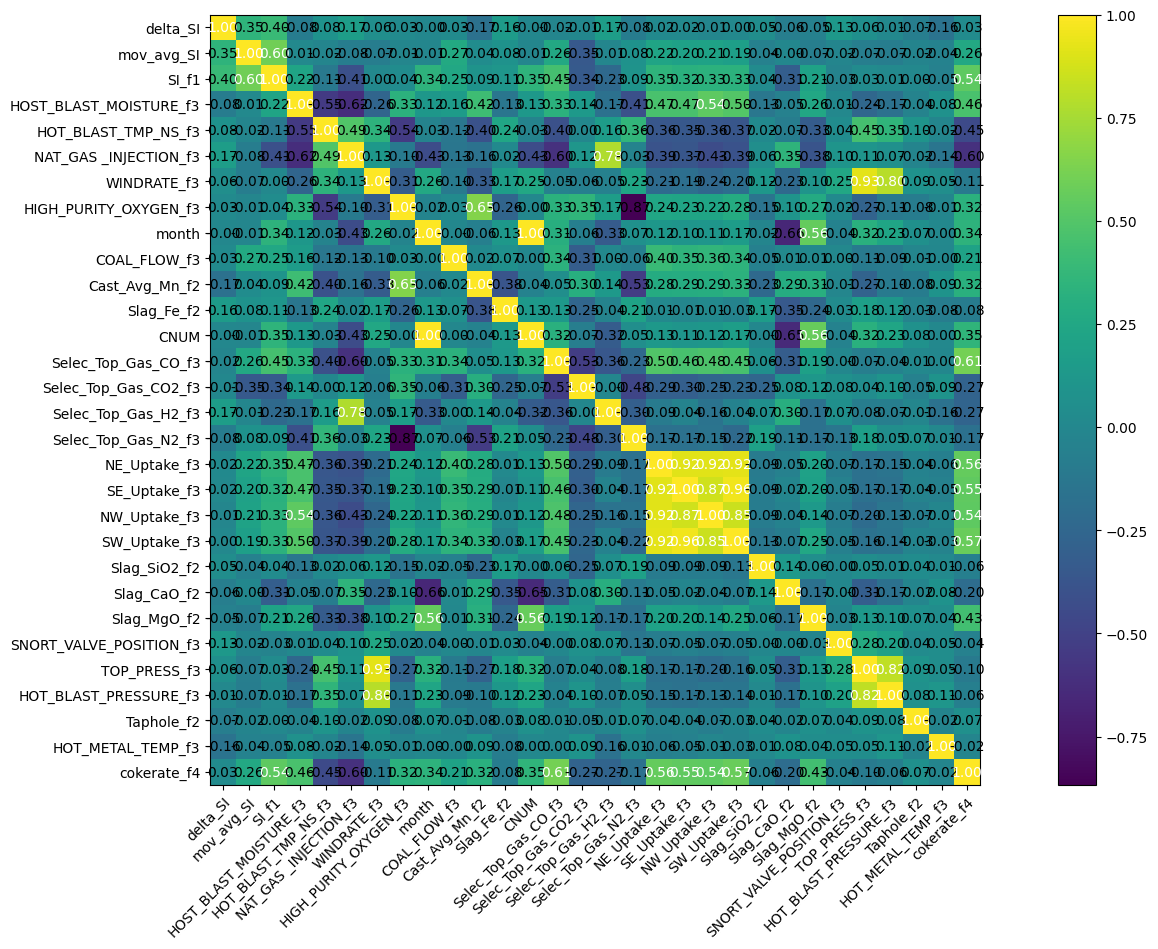

In [17]:


simple_plot_correlation_matrix( tsDataWrangling_obj.for_RNN_data_CIVS   )




## Pass Wrangled data to GPT experimenter


In [18]:

tsGPT_obj.for_RNN_data_CIVS = tsDataWrangling_obj.for_RNN_data_CIVS 

tsGPT_obj.length_n          = int(   tsGPT_obj.for_RNN_data_CIVS.shape[0]    )
print(     tsGPT_obj.length_n     )


1394



## Training Functions


In [19]:

def custom_loss_ratio(pred, real, mse_weight=0.8, log_ratio_weight=0.2):
    eps = 1e-6
    safe_ratio = torch.clamp(torch.abs((pred + eps) / (real + eps)), min=0.1, max=10.0)
    log_ratio = torch.log(safe_ratio + eps)
    ratio_loss = torch.mean(log_ratio ** 2)
    mse_loss = F.mse_loss(pred, real)
    return mse_weight * mse_loss + log_ratio_weight * ratio_loss



In [20]:

import torch

def log_cosh_loss(pred, target):
    """
    Computes the log-cosh loss between predictions and targets.
    This is smoother than MSE and less sensitive to outliers.

    Args:
        pred (Tensor): Predicted values (e.g., pred_si)
        target (Tensor): Ground truth values (e.g., y_si)

    Returns:
        Tensor: Scalar loss
    """
    return torch.mean(torch.log(torch.cosh(pred - target + 1e-6)))



In [21]:

def custom_loss(loss_SI, loss_all, beta=1.0, desired_ratio=0.25, clip_low=0.5, clip_high=2.0):
    """
    Parameters:
    - loss_SI: torch.Tensor (scalar) — Loss on the silicon prediction
    - loss_all: torch.Tensor (scalar) — Loss on the full feature vector
    - beta: float — weight for ratio regularization
    - desired_ratio: float — the target ratio of SI loss to total loss
    - clip_low, clip_high: float — clipping bounds for the loss ratio (like PPO)

    Returns:
    - loss_total: torch.Tensor (scalar)
    """

    # Compute the raw ratio
    raw_ratio = loss_SI / (loss_all.detach() + 1e-8)

    # Clip the ratio like PPO to prevent extreme swings
    clipped_ratio = torch.clamp(raw_ratio, clip_low, clip_high)

    # Use clipped ratio to weight the loss dynamically
    weighted_SI = clipped_ratio * loss_SI
    weighted_all = (1 - clipped_ratio) * loss_all

    # Main loss component (adaptive weighting)
    loss_main = weighted_SI + weighted_all

    # Regularization to encourage a specific SI/total ratio (stabilizes dynamics)
    loss_total_for_ratio = loss_SI + loss_all + 1e-8
    actual_ratio = loss_SI / loss_total_for_ratio
    ratio_reg = (actual_ratio - desired_ratio).pow(2)

    # Combine total loss
    loss_total = loss_main + beta * ratio_reg

    return loss_total



In [22]:


def function_train_rc(train_CIVS_2, reasoning_steps=1, backprop_through_steps=False):
    
    
    
    # === Model Setup ===
    model     = Time_Series_GPT.Time_Series_GPT(tsGPT_obj).to(tsGPT_obj.device)
    optimizer = torch.optim.Adam(model.parameters(), lr=tsGPT_obj.learning_rate, weight_decay=1e-4)

    criterion = nn.MSELoss()

    history = {
        'loss': [], 'test_loss': [],
        'loss_A': [], 'loss_B': [], 'loss_C': [],
        'loss_SIM0': [], 'loss_SIM1': [], 'loss_SIM2': [],
        'loss_SIM3': [], 'loss_SIM4': [], 'loss_SIM5': []
    }

 
    train_CIVS_tr, x_means, x_standard_devs = tsGPT_obj.standardize_x_scales(train_CIVS_2)
    train_CIVS_tr_scaled                    = (train_CIVS_tr - x_means) / x_standard_devs

    model.train()
    
    for batch_i, epoch in enumerate(range(tsGPT_obj.max_iters)):
        
        xb, yb = tsGPT_obj.get_batch( train_CIVS_tr_scaled )  # shapes: [B, T, F]
        
        
        if model.training:
            noise = 0.01 * torch.randn_like(xb)
            xb    = xb + noise.clamp(-0.05, 0.05)

        
        idx_pred, pred_si = model(
            xb, 
            targets=None, 
            reasoning_steps=reasoning_steps,
            backprop_through_steps=backprop_through_steps,
            return_si=True  
        )  
        
        ## [B, 10, 35],  [B, 10, 1]
        ## idx_pred,     pred_si 
        
       
        B, T, E = xb.shape
        
        pred_si = pred_si.squeeze(2)
        
        
        ###################################################################################
        
        loss_all    = criterion( idx_pred[:,-tsGPT_obj.block_size :, :] , yb)    ## all 10 of 10
        
        y_si        =  yb[:, :, 2]     ## [B, 10, 1]
        
        
        
        ###################################################################################
        
        ## print(pred_si.shape)
        ## print(y_si.shape)
        
        pred_si = pred_si[:, :3]
        y_si    =    y_si[:, :3]
        
        loss_mse     = F.mse_loss(    pred_si, y_si)
        loss_cosh    = log_cosh_loss( pred_si, y_si)
        loss_SI_main = 0.5 * loss_mse + 0.5 * loss_cosh
        loss_SI      = loss_SI_main
        
        ###################################################################################
        ## Trying weighted loss al, to focus on first 4, if not work, remove this whole block
        
        
        ##weights = torch.tensor([5, 4, 4, 2, 1, 1, 1, 1, 1, 1], device=pred_si.device, dtype=pred_si.dtype)
        ## weights = weights / weights.sum()  # Normalize
        ## loss_SI = ((pred_si - y_si) ** 2 * weights.view(1, -1, 1)).mean()
        
       
        ##################################
        
        alpha = 0.8
        
        loss_total = alpha * loss_SI + (1 - alpha) * loss_all
        
        ##################################
        
     
        optimizer.zero_grad(set_to_none=True)
        loss_total.backward()
        optimizer.step()
         

        # === Logging ===
        history['loss'].append(loss_total.item())
        history['loss_A'].append(loss_SI.item())
        history['loss_B'].append(loss_all.item())
        history['loss_C'].append(0)

        # Placeholders if Curve_SIMs aren't defined
        history['loss_SIM0'].append(0)
        history['loss_SIM1'].append(0)
        

        # === Debug Print ===
        if batch_i % 200 == 0:
            print(f"[{batch_i}] Train Loss: {loss_total.item():.6f}")
            print("Loss_SI:", loss_SI.item(), "Loss_all:", loss_all.item())
            ## print("Prediction shape:", pred.shape)
            print("===")

    tsGPT_obj.plot_losses_training(history)
    return model, history, x_means, x_standard_devs, train_CIVS_tr_scaled






## Train on Train, Test on Test



## Run 1


In [23]:

all_real_si_300to400 = []
all_pred_si_300to400 = []

all_real_si_200to400 = []
all_pred_si_200to400 = []

all_real_si_100to400 = []
all_pred_si_100to400 = []

all_real_si_000to400 = []
all_pred_si_000to400 = []


In [24]:

chunk300to400_train, chunk200to400_train, chunk100to400_train, chunk000to400_train, test_CIVS = tsGPT_obj.random_4_runs()


[0] Train Loss: 0.462184
Loss_SI: 0.32126331329345703 Loss_all: 1.0258643627166748
===
[200] Train Loss: 0.079893
Loss_SI: 0.04505399614572525 Loss_all: 0.21924783289432526
===
[400] Train Loss: 0.058410
Loss_SI: 0.02674947679042816 Loss_all: 0.18505266308784485
===
[600] Train Loss: 0.036343
Loss_SI: 0.01624443009495735 Loss_all: 0.11673480272293091
===
[800] Train Loss: 0.032569
Loss_SI: 0.016396569088101387 Loss_all: 0.097256600856781
===


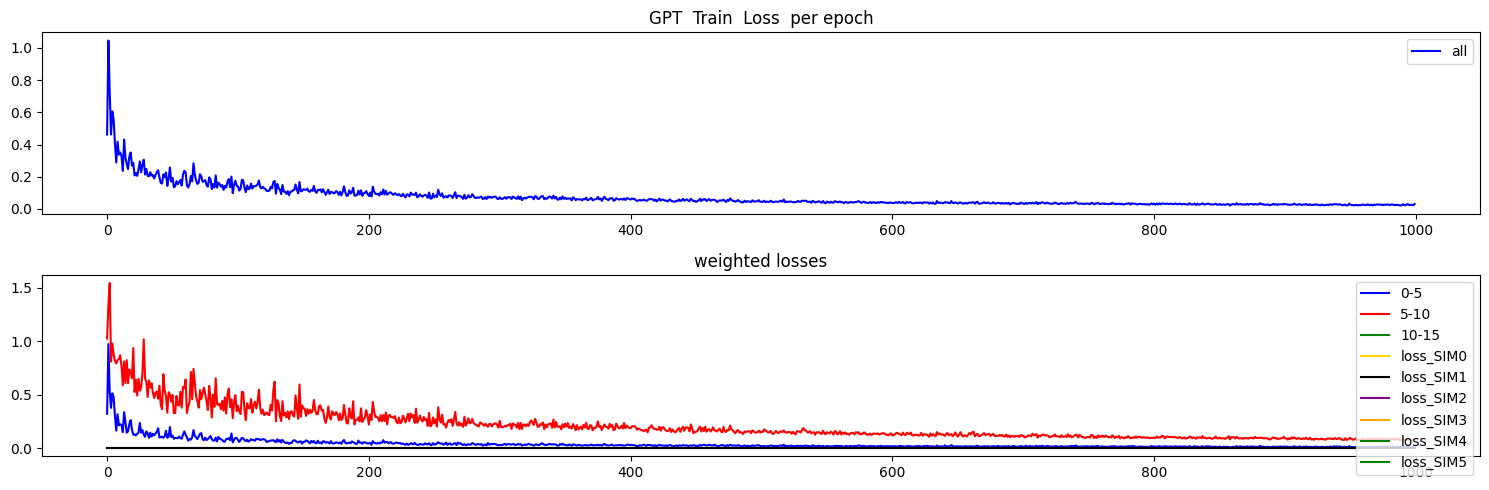

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(19,)
pred_si (1, 9, 1)
(9,)
(19,)
****
(19,)


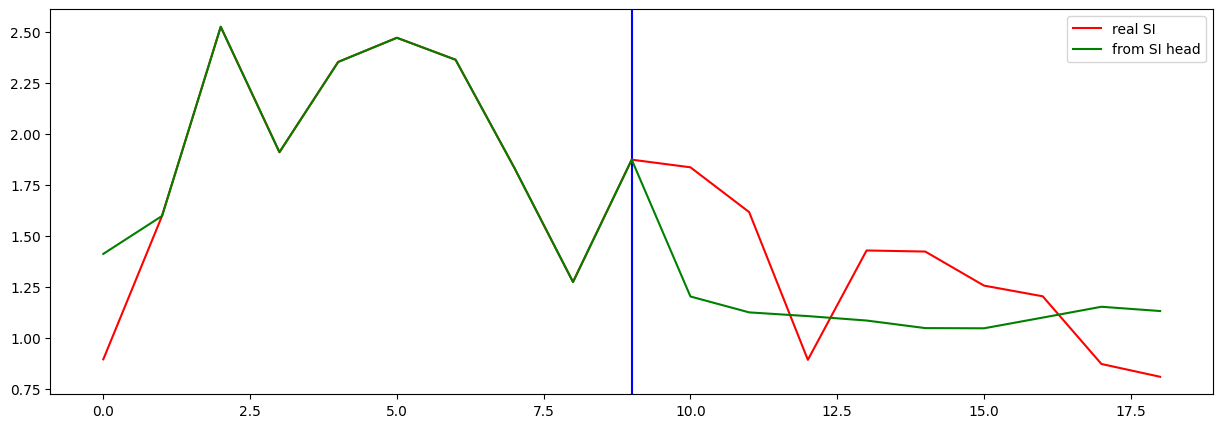

Testing R**2 - (all) - (no inputs):  0.9943932261905986
Testing R**2 - (f2) - SI full (no inputs):  -0.530156958733998
Testing R**2 - SI head only (no inputs):  -0.03949472713408442
0 ...index R**2 (no inputs):  -0.09931135874491259
1 ...index R**2 (no inputs):  -3.4809078975480086
2 ...index R**2 (no inputs):  -0.530156958733998
3 ...index R**2 (no inputs):  -1.0428668411131583
4 ...index R**2 (no inputs):  -5.111208221120727
5 ...index R**2 (no inputs):  -1175.5543420413446
6 ...index R**2 (no inputs):  -1.5646187621390495
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.4774050602644626
10 ...index R**2 (no inputs):  -2.649688423339453
11 ...index R**2 (no inputs):  -211.49855060128198
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -11.56032378996364
16 ...index R**2 (no inputs):  -10.405676411459833
17 ...index R**2 (no inputs):  -584.14383672

In [25]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                          chunk300to400_train,    
                          reasoning_steps=10,
                          backprop_through_steps=True
) 


res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk300to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_300to400.append( res_real )
all_pred_si_300to400.append( res_pred )


[0] Train Loss: 0.373363
Loss_SI: 0.20138448476791382 Loss_all: 1.0612777471542358
===
[200] Train Loss: 0.203697
Loss_SI: 0.14371943473815918 Loss_all: 0.4436071813106537
===
[400] Train Loss: 0.102997
Loss_SI: 0.05697030574083328 Loss_all: 0.28710147738456726
===
[600] Train Loss: 0.094095
Loss_SI: 0.0517730712890625 Loss_all: 0.26338139176368713
===
[800] Train Loss: 0.069892
Loss_SI: 0.03342888131737709 Loss_all: 0.2157442271709442
===


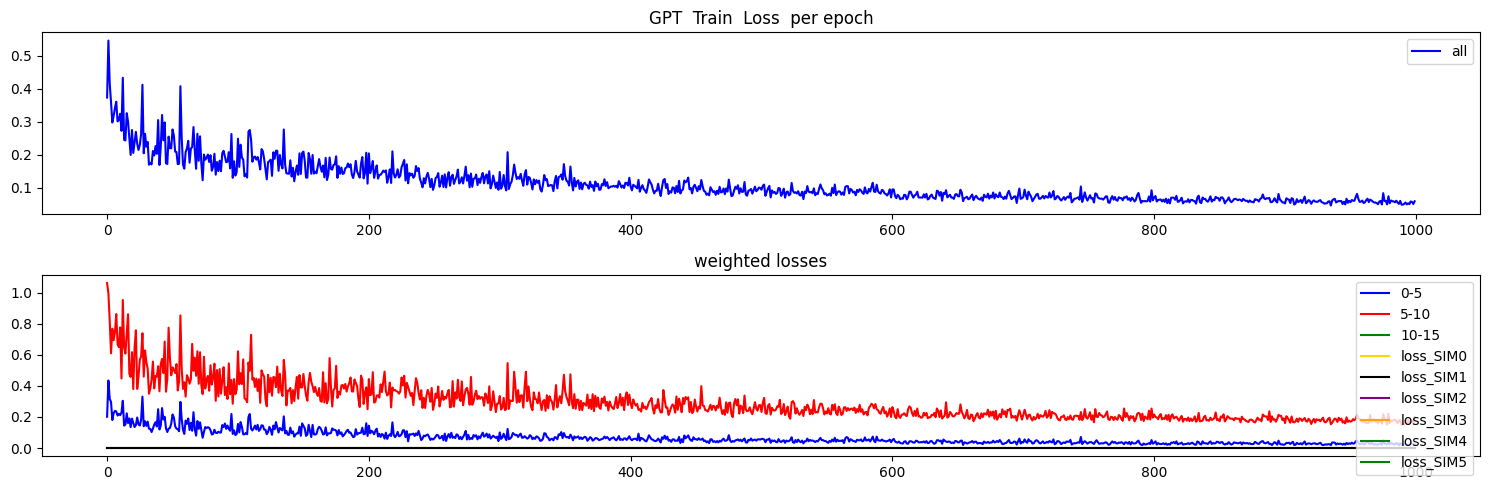

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(19,)
pred_si (1, 9, 1)
(9,)
(19,)
****
(19,)


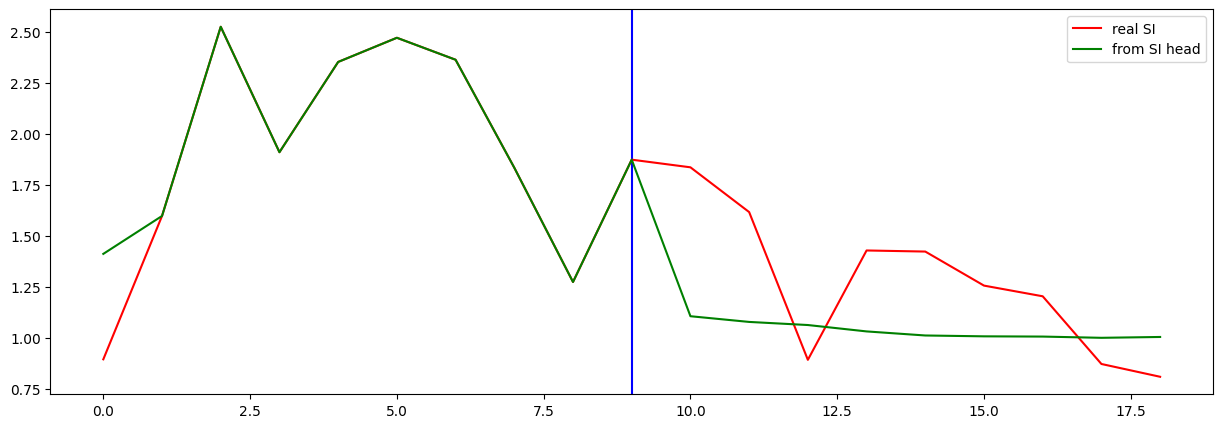

Testing R**2 - (all) - (no inputs):  0.9929323075332189
Testing R**2 - (f2) - SI full (no inputs):  -0.2894642628128199
Testing R**2 - SI head only (no inputs):  -0.05381983605406071
0 ...index R**2 (no inputs):  -0.14014639172221632
1 ...index R**2 (no inputs):  -3.8962946685938205
2 ...index R**2 (no inputs):  -0.2894642628128199
3 ...index R**2 (no inputs):  -7.812535952597656
4 ...index R**2 (no inputs):  -4.924507023471066
5 ...index R**2 (no inputs):  -1483.2312480662636
6 ...index R**2 (no inputs):  0.3112370824947496
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.44693533522546414
10 ...index R**2 (no inputs):  -2.686973730308997
11 ...index R**2 (no inputs):  -233.5890697626631
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -9.324443086715723
16 ...index R**2 (no inputs):  -4.218011681936752
17 ...index R**2 (no inputs):  -701.633007601

In [26]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                         chunk200to400_train,
                         reasoning_steps=10,
                         backprop_through_steps=True
)


res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk200to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, 9  )

print( res_real )
print( res_pred )

all_real_si_200to400.append( res_real )
all_pred_si_200to400.append( res_pred )


[0] Train Loss: 0.747508
Loss_SI: 0.6606233716011047 Loss_all: 1.0950472354888916
===
[200] Train Loss: 0.203735
Loss_SI: 0.1635974645614624 Loss_all: 0.36428308486938477
===
[400] Train Loss: 0.184787
Loss_SI: 0.13037075102329254 Loss_all: 0.4024530053138733
===
[600] Train Loss: 0.136862
Loss_SI: 0.08968397229909897 Loss_all: 0.325573593378067
===
[800] Train Loss: 0.098573
Loss_SI: 0.047779977321624756 Loss_all: 0.30174463987350464
===


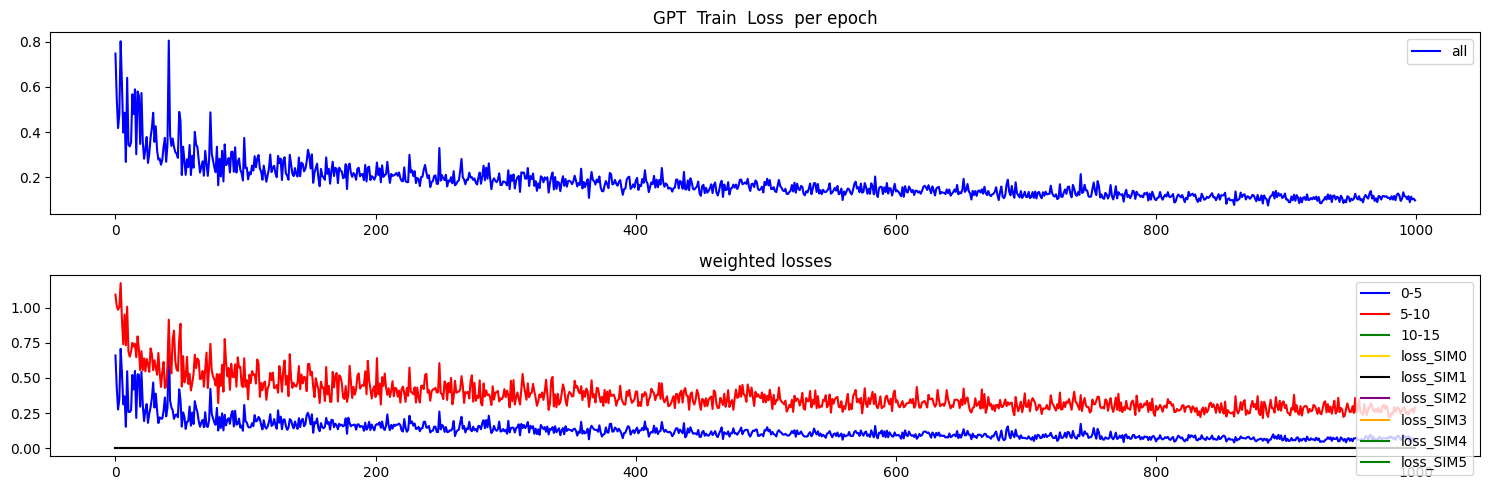

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(19,)
pred_si (1, 9, 1)
(9,)
(19,)
****
(19,)


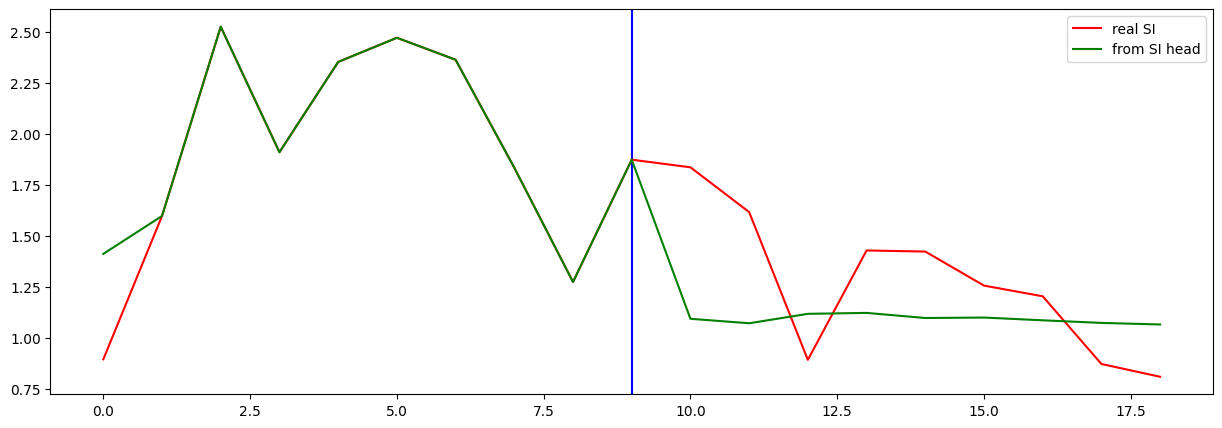

Testing R**2 - (all) - (no inputs):  0.9791420379700475
Testing R**2 - (f2) - SI full (no inputs):  0.138475834729066
Testing R**2 - SI head only (no inputs):  0.049687469548553076
0 ...index R**2 (no inputs):  0.033081497956343076
1 ...index R**2 (no inputs):  -4.141467358869251
2 ...index R**2 (no inputs):  0.138475834729066
3 ...index R**2 (no inputs):  -6.58647825080354
4 ...index R**2 (no inputs):  -52.167501436357945
5 ...index R**2 (no inputs):  -4407.198867050335
6 ...index R**2 (no inputs):  -29.03376435430755
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  0.25010155496979136
10 ...index R**2 (no inputs):  -0.9228019861643395
11 ...index R**2 (no inputs):  -30.7412138468208
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -0.5843646888755714
16 ...index R**2 (no inputs):  -1.4299598946275047
17 ...index R**2 (no inputs):  -2662.482339493667


In [27]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                         chunk100to400_train,  
                         reasoning_steps=10,
                         backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk100to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_100to400.append( res_real )
all_pred_si_100to400.append( res_pred )


[0] Train Loss: 0.554511
Loss_SI: 0.3979122042655945 Loss_all: 1.1809065341949463
===
[200] Train Loss: 0.247707
Loss_SI: 0.1887717992067337 Loss_all: 0.4834466576576233
===
[400] Train Loss: 0.199558
Loss_SI: 0.1436258852481842 Loss_all: 0.42328402400016785
===
[600] Train Loss: 0.211175
Loss_SI: 0.12532252073287964 Loss_all: 0.5545849800109863
===
[800] Train Loss: 0.137044
Loss_SI: 0.09446202218532562 Loss_all: 0.30737006664276123
===


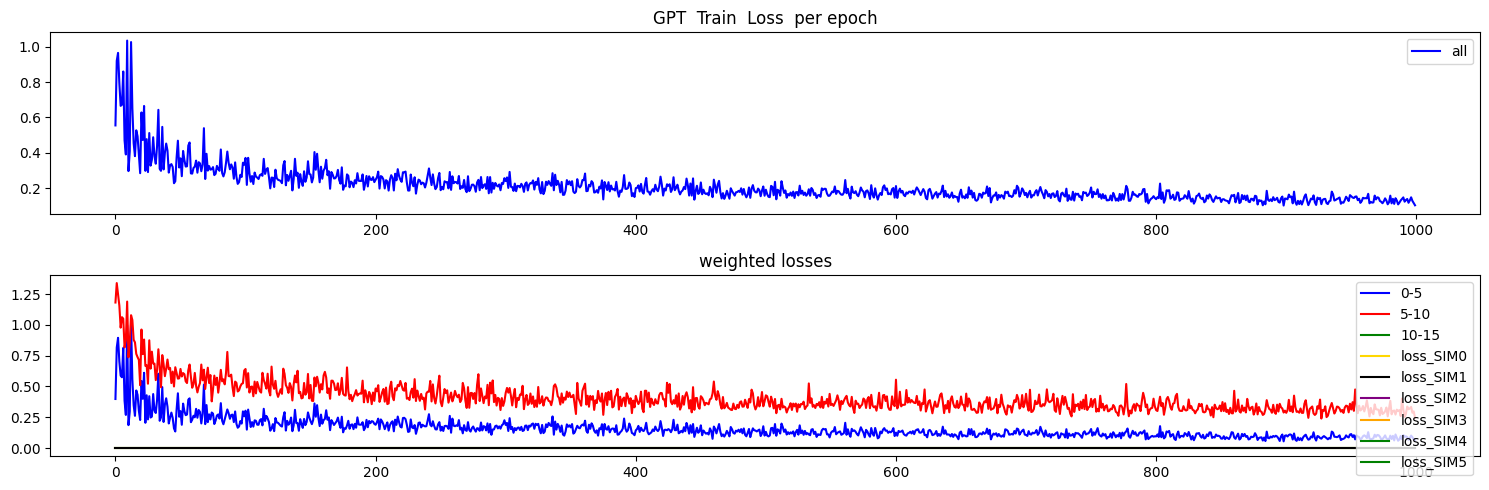

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(19,)
pred_si (1, 9, 1)
(9,)
(19,)
****
(19,)


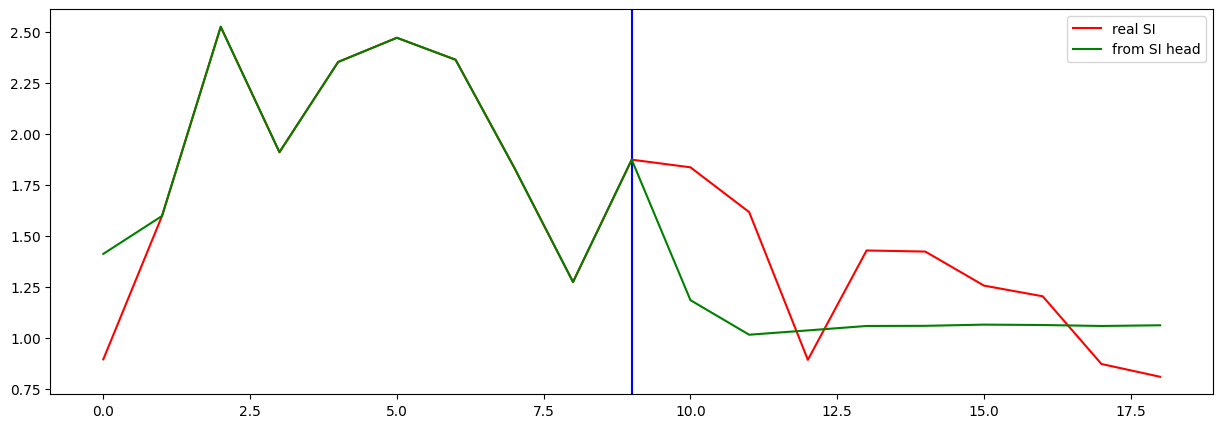

Testing R**2 - (all) - (no inputs):  0.9616388954188837
Testing R**2 - (f2) - SI full (no inputs):  0.2764229214307389
Testing R**2 - SI head only (no inputs):  0.050869086792764695
0 ...index R**2 (no inputs):  0.13358768283636002
1 ...index R**2 (no inputs):  -4.471792197495823
2 ...index R**2 (no inputs):  0.2764229214307389
3 ...index R**2 (no inputs):  -5.9778112694359695
4 ...index R**2 (no inputs):  -12.996268989313515
5 ...index R**2 (no inputs):  -8226.506503291079
6 ...index R**2 (no inputs):  -3.0888577719620534
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  0.04700575614502256
10 ...index R**2 (no inputs):  -0.39573153063837974
11 ...index R**2 (no inputs):  -161.89511160396205
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -10.08322116299294
16 ...index R**2 (no inputs):  -7.421297843362497
17 ...index R**2 (no inputs):  -55.9502129457

In [28]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                         chunk000to400_train,
                         reasoning_steps=10,
                         backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk000to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_000to400.append( res_real )
all_pred_si_000to400.append( res_pred )



## Run 2


In [29]:

chunk300to400_train, chunk200to400_train, chunk100to400_train, chunk000to400_train, test_CIVS = tsGPT_obj.random_4_runs()


[0] Train Loss: 0.762630
Loss_SI: 0.6549113988876343 Loss_all: 1.1935043334960938
===
[200] Train Loss: 0.146943
Loss_SI: 0.08230997622013092 Loss_all: 0.40547293424606323
===
[400] Train Loss: 0.077130
Loss_SI: 0.03293357044458389 Loss_all: 0.2539156973361969
===
[600] Train Loss: 0.063105
Loss_SI: 0.02867135778069496 Loss_all: 0.20084106922149658
===
[800] Train Loss: 0.047470
Loss_SI: 0.023684635758399963 Loss_all: 0.14261391758918762
===


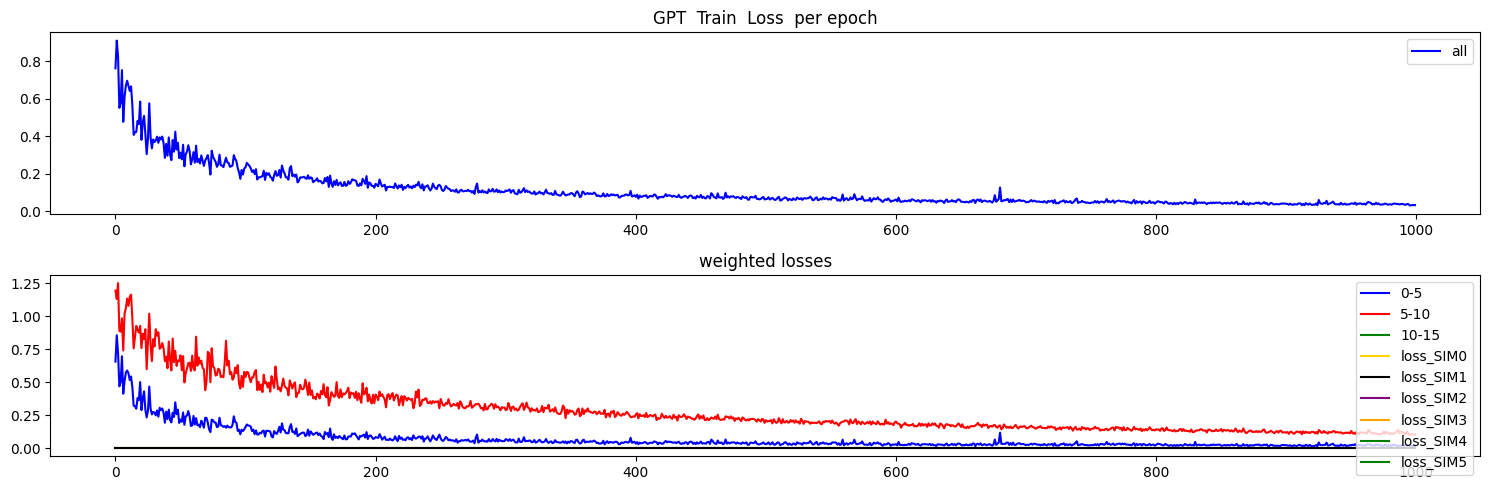

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(19,)
pred_si (1, 9, 1)
(9,)
(19,)
****
(19,)


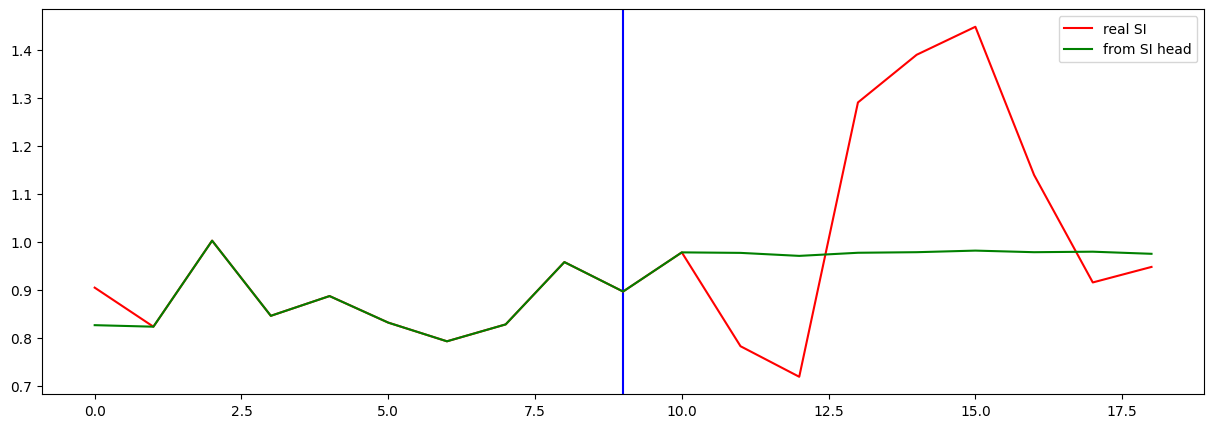

Testing R**2 - (all) - (no inputs):  0.9804911170941635
Testing R**2 - (f2) - SI full (no inputs):  -0.3599614583609141
Testing R**2 - SI head only (no inputs):  -0.11024337802877615
0 ...index R**2 (no inputs):  -0.009315335500739597
1 ...index R**2 (no inputs):  -1.0980204044173827
2 ...index R**2 (no inputs):  -0.3599614583609141
3 ...index R**2 (no inputs):  -11.55302544339436
4 ...index R**2 (no inputs):  0.004711716415923606
5 ...index R**2 (no inputs):  -0.3558560602455305
6 ...index R**2 (no inputs):  -1.995809466231091
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.08600709722754596
10 ...index R**2 (no inputs):  -0.7816147213929938
11 ...index R**2 (no inputs):  0.13835895844989077
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -0.8843482967391167
16 ...index R**2 (no inputs):  -3.0123899556958316
17 ...index R**2 (no inputs):  0.37241

In [30]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                         chunk300to400_train,
                         reasoning_steps=10,
                         backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk300to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )

print( res_real )
print( res_pred )

all_real_si_300to400.append( res_real )
all_pred_si_300to400.append( res_pred )


[0] Train Loss: 0.641548
Loss_SI: 0.5537260174751282 Loss_all: 0.9928382039070129
===
[200] Train Loss: 0.278920
Loss_SI: 0.19707652926445007 Loss_all: 0.606296181678772
===
[400] Train Loss: 0.164963
Loss_SI: 0.1092110201716423 Loss_all: 0.3879702389240265
===
[600] Train Loss: 0.156688
Loss_SI: 0.10048869997262955 Loss_all: 0.3814871311187744
===
[800] Train Loss: 0.100884
Loss_SI: 0.06569957733154297 Loss_all: 0.24162165820598602
===


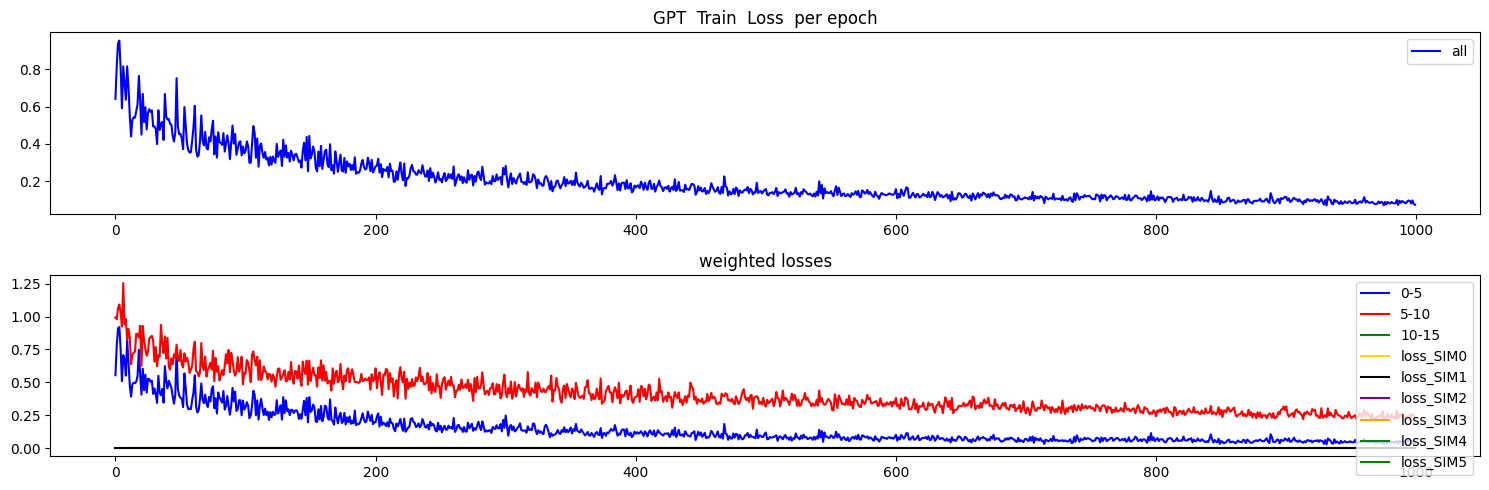

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(19,)
pred_si (1, 9, 1)
(9,)
(19,)
****
(19,)


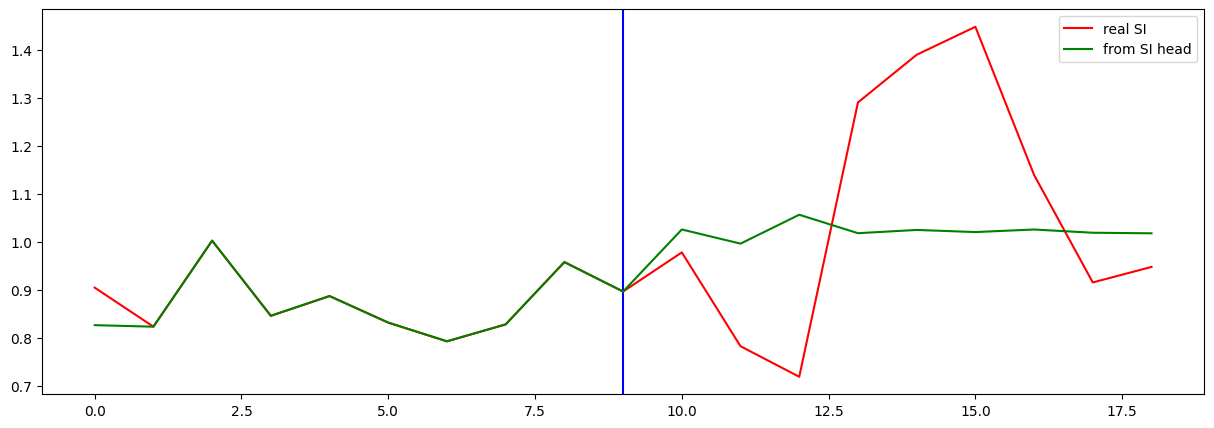

Testing R**2 - (all) - (no inputs):  0.9708964913396736
Testing R**2 - (f2) - SI full (no inputs):  -0.12609776382162763
Testing R**2 - SI head only (no inputs):  0.0304659779075529
0 ...index R**2 (no inputs):  -0.1373714199433016
1 ...index R**2 (no inputs):  -0.1710714727340943
2 ...index R**2 (no inputs):  -0.12609776382162763
3 ...index R**2 (no inputs):  -19.602472422284105
4 ...index R**2 (no inputs):  0.19209242788544234
5 ...index R**2 (no inputs):  -1.021905635668313
6 ...index R**2 (no inputs):  -3.198122813321307
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  0.16000717431867317
10 ...index R**2 (no inputs):  -1.540922076403095
11 ...index R**2 (no inputs):  -13.419210243871955
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -0.281995863415226
16 ...index R**2 (no inputs):  -3.78919018887514
17 ...index R**2 (no inputs):  -12.50824742205

In [31]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                          chunk200to400_train,
                          reasoning_steps=10,
                          backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk200to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_200to400.append( res_real )
all_pred_si_200to400.append( res_pred )


[0] Train Loss: 0.725133
Loss_SI: 0.627680778503418 Loss_all: 1.1149427890777588
===
[200] Train Loss: 0.325645
Loss_SI: 0.25517985224723816 Loss_all: 0.6075040698051453
===
[400] Train Loss: 0.280769
Loss_SI: 0.23166432976722717 Loss_all: 0.4771886169910431
===
[600] Train Loss: 0.222532
Loss_SI: 0.1498154103755951 Loss_all: 0.5133987665176392
===
[800] Train Loss: 0.154236
Loss_SI: 0.11043152213096619 Loss_all: 0.32945263385772705
===


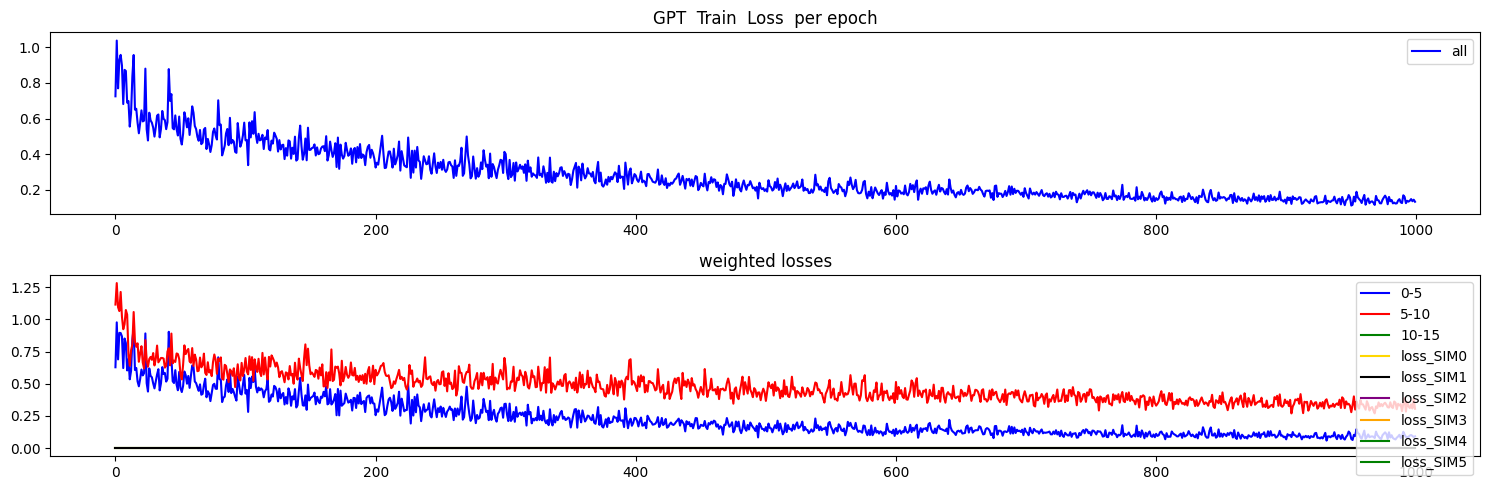

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(19,)
pred_si (1, 9, 1)
(9,)
(19,)
****
(19,)


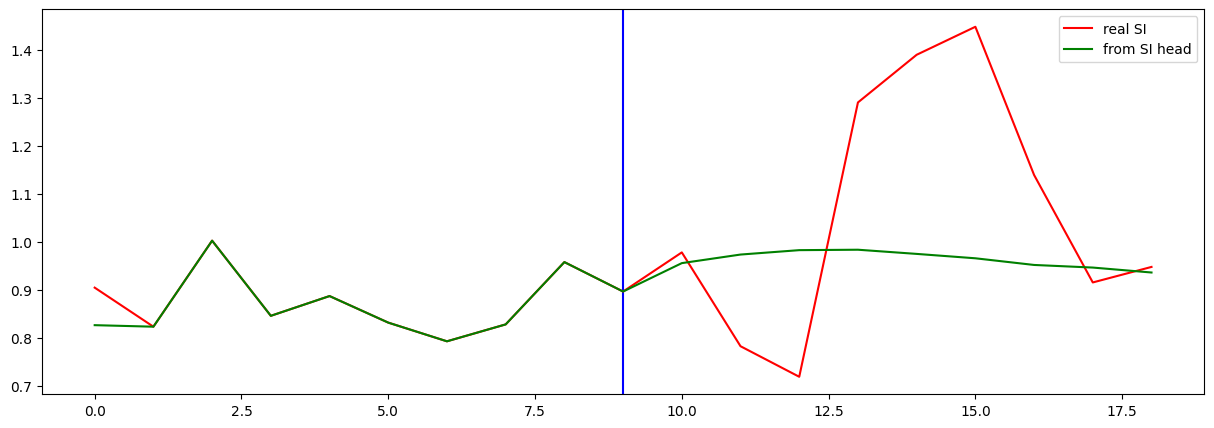

Testing R**2 - (all) - (no inputs):  0.97704772018772
Testing R**2 - (f2) - SI full (no inputs):  -0.08221177130753277
Testing R**2 - SI head only (no inputs):  -0.07216431109048438
0 ...index R**2 (no inputs):  0.03408934096358196
1 ...index R**2 (no inputs):  -0.8026646301904474
2 ...index R**2 (no inputs):  -0.08221177130753277
3 ...index R**2 (no inputs):  -16.10400737841485
4 ...index R**2 (no inputs):  -0.39117382944743717
5 ...index R**2 (no inputs):  -0.594820653543924
6 ...index R**2 (no inputs):  -13.040057896492602
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  0.10195937444996739
10 ...index R**2 (no inputs):  -0.4803423198481933
11 ...index R**2 (no inputs):  -1.4553197948297103
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -0.17001054346857813
16 ...index R**2 (no inputs):  -0.7062947981067813
17 ...index R**2 (no inputs):  -21.56713

In [32]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                          chunk100to400_train,
                          reasoning_steps=10,
                          backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk100to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, 9  )

print( res_real )
print( res_pred )

all_real_si_100to400.append( res_real )
all_pred_si_100to400.append( res_pred )


[0] Train Loss: 0.767120
Loss_SI: 0.6222896575927734 Loss_all: 1.346441626548767
===
[200] Train Loss: 0.463626
Loss_SI: 0.4379291236400604 Loss_all: 0.5664145946502686
===
[400] Train Loss: 0.338056
Loss_SI: 0.3021330237388611 Loss_all: 0.48174822330474854
===
[600] Train Loss: 0.210419
Loss_SI: 0.18059846758842468 Loss_all: 0.3297002613544464
===
[800] Train Loss: 0.180483
Loss_SI: 0.12132705748081207 Loss_all: 0.41710591316223145
===


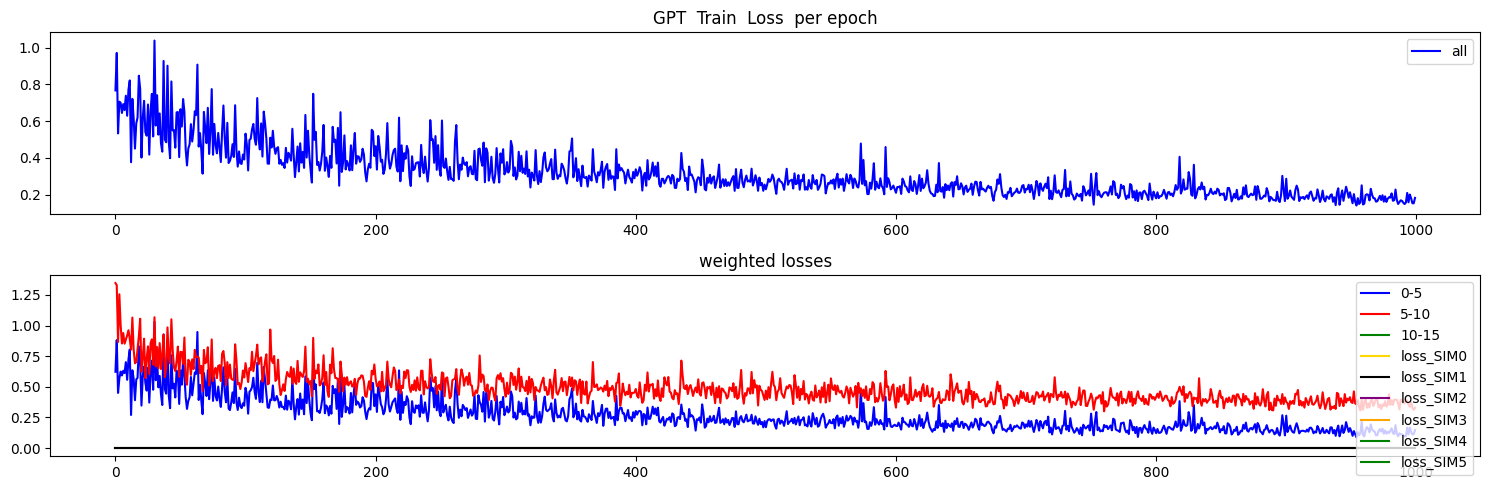

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(19,)
pred_si (1, 9, 1)
(9,)
(19,)
****
(19,)


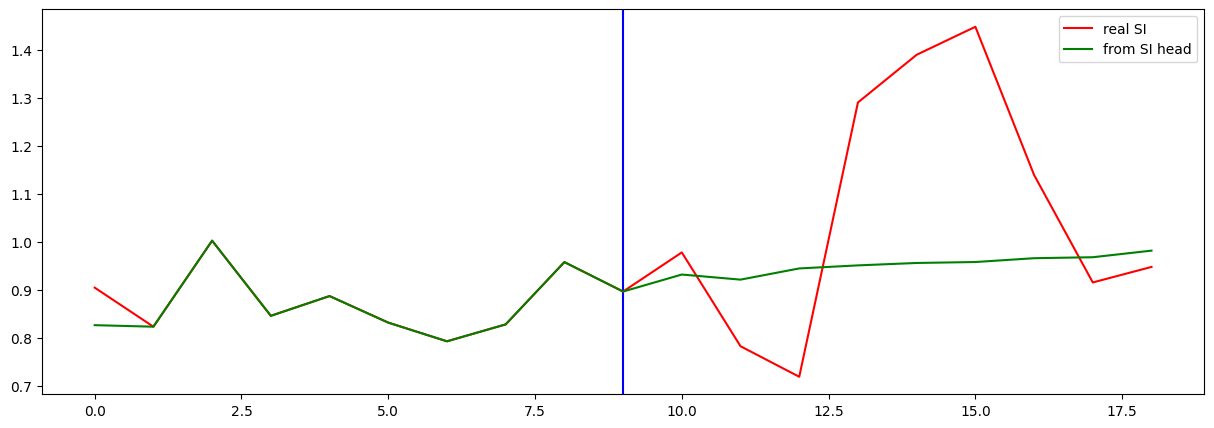

Testing R**2 - (all) - (no inputs):  0.9839292571924491
Testing R**2 - (f2) - SI full (no inputs):  -0.04231377113142054
Testing R**2 - SI head only (no inputs):  -0.15726919640078552
0 ...index R**2 (no inputs):  -0.07296537707796302
1 ...index R**2 (no inputs):  -0.2546522875629669
2 ...index R**2 (no inputs):  -0.04231377113142054
3 ...index R**2 (no inputs):  -14.627879958740234
4 ...index R**2 (no inputs):  0.1630332499906706
5 ...index R**2 (no inputs):  -0.11549913587466687
6 ...index R**2 (no inputs):  -92.53566818940013
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.000266598222800285
10 ...index R**2 (no inputs):  -1.7892957627985502
11 ...index R**2 (no inputs):  -30.153605988366852
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -0.21133618480742555
16 ...index R**2 (no inputs):  -0.4812510470583009
17 ...index R**2 (no inputs):  -9.8

In [33]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                          chunk000to400_train,
                          reasoning_steps=10,
                          backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk000to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )

print( res_real )
print( res_pred )

all_real_si_000to400.append( res_real )
all_pred_si_000to400.append( res_pred )



## Run 3


In [34]:

chunk300to400_train, chunk200to400_train, chunk100to400_train, chunk000to400_train, test_CIVS = tsGPT_obj.random_4_runs()


[0] Train Loss: 0.910718
Loss_SI: 0.8410698175430298 Loss_all: 1.1893115043640137
===
[200] Train Loss: 0.180249
Loss_SI: 0.11602416634559631 Loss_all: 0.4371507465839386
===
[400] Train Loss: 0.101218
Loss_SI: 0.05373191833496094 Loss_all: 0.29116126894950867
===
[600] Train Loss: 0.063114
Loss_SI: 0.023224133998155594 Loss_all: 0.22267460823059082
===
[800] Train Loss: 0.054338
Loss_SI: 0.024248555302619934 Loss_all: 0.17469407618045807
===


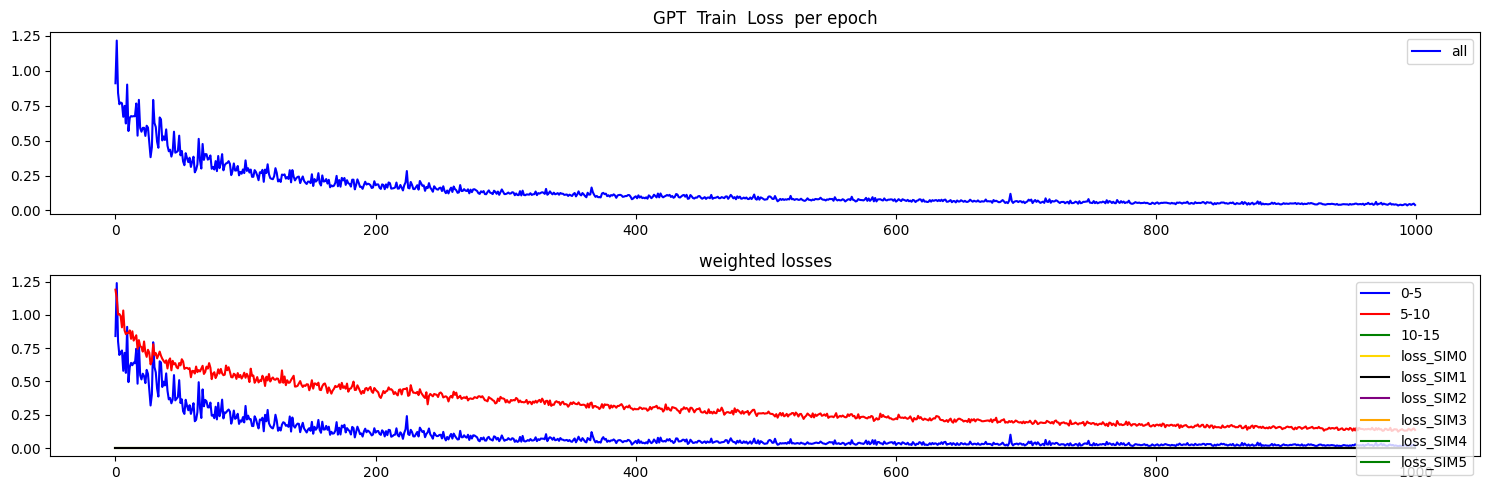

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(19,)
pred_si (1, 9, 1)
(9,)
(19,)
****
(19,)


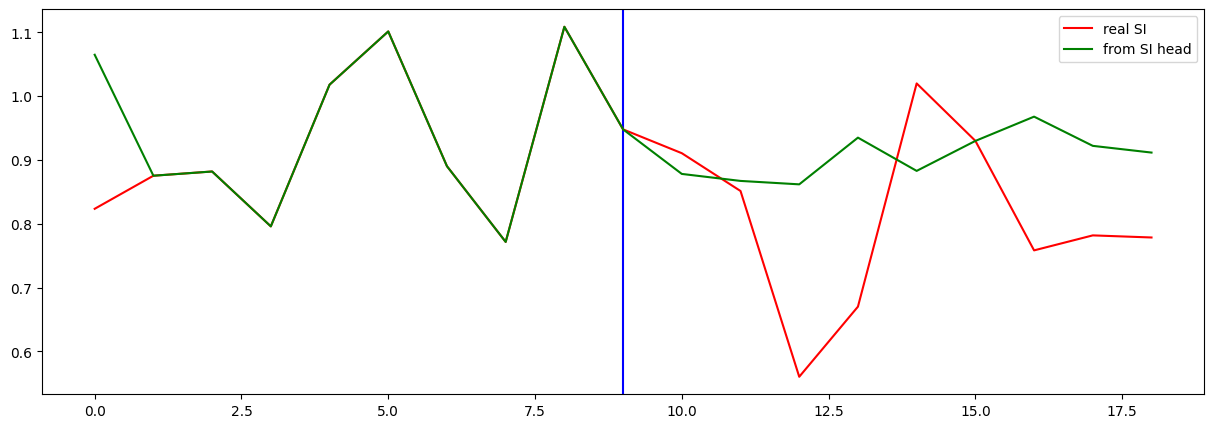

Testing R**2 - (all) - (no inputs):  0.9849748359734046
Testing R**2 - (f2) - SI full (no inputs):  -2.6062045919336887
Testing R**2 - SI head only (no inputs):  -0.6075013835126877
0 ...index R**2 (no inputs):  0.26727769767358045
1 ...index R**2 (no inputs):  -0.7664262366932881
2 ...index R**2 (no inputs):  -2.6062045919336887
3 ...index R**2 (no inputs):  -2.837520458608925
4 ...index R**2 (no inputs):  -0.22901378219023094
5 ...index R**2 (no inputs):  -0.23793095294365085
6 ...index R**2 (no inputs):  -1.1171395961926356
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.5894234833415914
10 ...index R**2 (no inputs):  -0.23591465516010124
11 ...index R**2 (no inputs):  -1.7146966060950848
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -0.9056159198220972
16 ...index R**2 (no inputs):  -1.2516922843289584
17 ...index R**2 (no inputs):  0.171028

In [35]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                           chunk300to400_train,
                           reasoning_steps=10,
                           backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk300to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )

print( res_real )
print( res_pred )

all_real_si_300to400.append( res_real )
all_pred_si_300to400.append( res_pred )

[0] Train Loss: 0.880294
Loss_SI: 0.7965645790100098 Loss_all: 1.2152122259140015
===
[200] Train Loss: 0.309997
Loss_SI: 0.273518830537796 Loss_all: 0.455911785364151
===
[400] Train Loss: 0.185633
Loss_SI: 0.1306113749742508 Loss_all: 0.4057207703590393
===
[600] Train Loss: 0.140099
Loss_SI: 0.0896468460559845 Loss_all: 0.34190574288368225
===
[800] Train Loss: 0.108010
Loss_SI: 0.06324432790279388 Loss_all: 0.2870703935623169
===


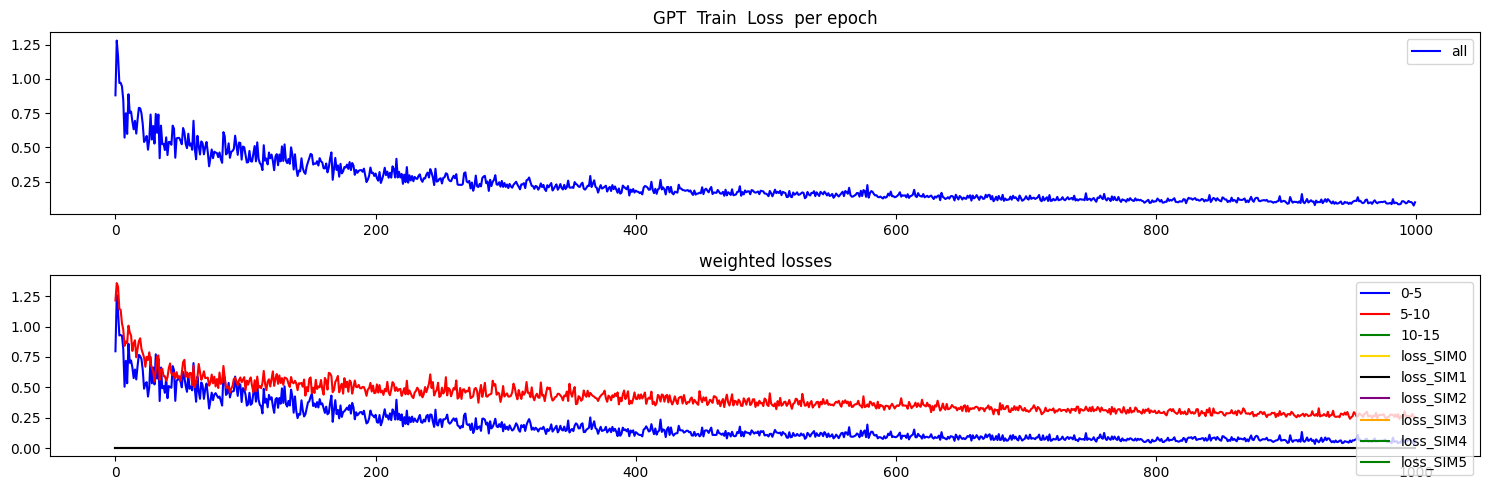

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(19,)
pred_si (1, 9, 1)
(9,)
(19,)
****
(19,)


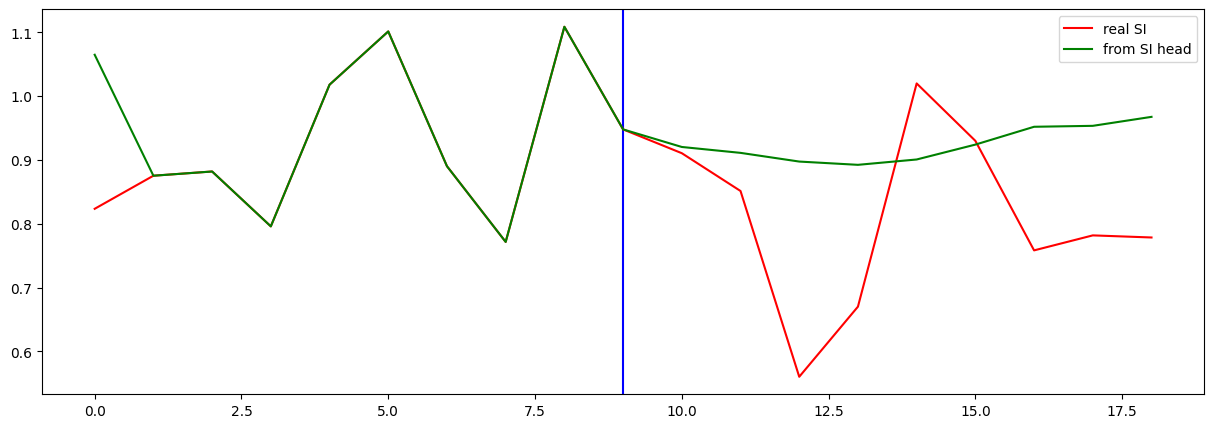

Testing R**2 - (all) - (no inputs):  0.9876306615072693
Testing R**2 - (f2) - SI full (no inputs):  -2.346339613692088
Testing R**2 - SI head only (no inputs):  -1.0964173988062509
0 ...index R**2 (no inputs):  -0.08865972789307186
1 ...index R**2 (no inputs):  -1.6472205364837662
2 ...index R**2 (no inputs):  -2.346339613692088
3 ...index R**2 (no inputs):  -2.828885953002633
4 ...index R**2 (no inputs):  -0.13142449022283875
5 ...index R**2 (no inputs):  -0.015306266265515456
6 ...index R**2 (no inputs):  -1.2988025608428861
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.25636531735627766
10 ...index R**2 (no inputs):  -1.9867430934099475
11 ...index R**2 (no inputs):  -92.88714811037701
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -0.19407121428088225
16 ...index R**2 (no inputs):  0.24804192617310394
17 ...index R**2 (no inputs):  -1.57677

In [36]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                            chunk200to400_train,
                            reasoning_steps=10,
                            backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk200to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )

print( res_real )
print( res_pred )

all_real_si_200to400.append( res_real )
all_pred_si_200to400.append( res_pred )

[0] Train Loss: 0.787936
Loss_SI: 0.6706511974334717 Loss_all: 1.2570769786834717
===
[200] Train Loss: 0.361010
Loss_SI: 0.30734723806381226 Loss_all: 0.57566237449646
===
[400] Train Loss: 0.248835
Loss_SI: 0.1833573281764984 Loss_all: 0.5107464790344238
===
[600] Train Loss: 0.195636
Loss_SI: 0.15249919891357422 Loss_all: 0.36818525195121765
===
[800] Train Loss: 0.175395
Loss_SI: 0.13207298517227173 Loss_all: 0.3486838638782501
===


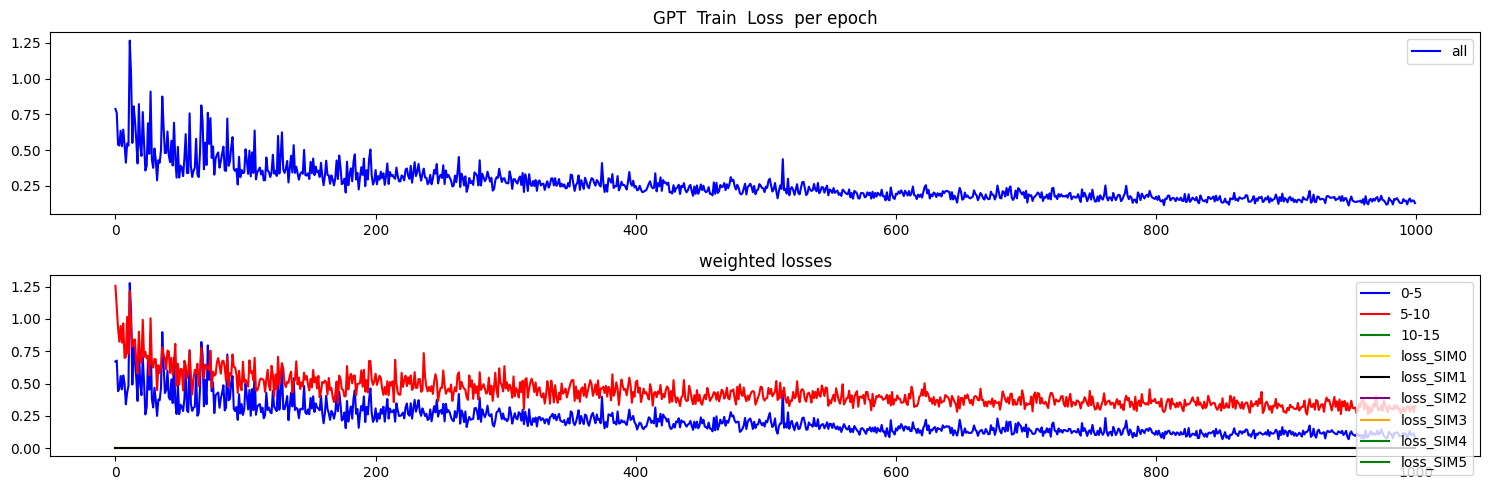

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(19,)
pred_si (1, 9, 1)
(9,)
(19,)
****
(19,)


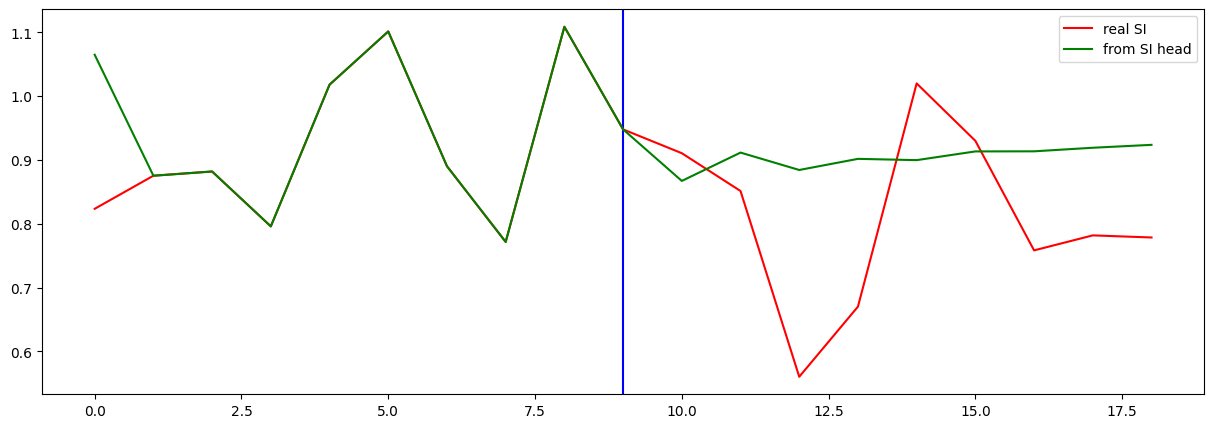

Testing R**2 - (all) - (no inputs):  0.9816535396428072
Testing R**2 - (f2) - SI full (no inputs):  -1.5389187044302273
Testing R**2 - SI head only (no inputs):  -0.7600220170921008
0 ...index R**2 (no inputs):  0.011380669226337181
1 ...index R**2 (no inputs):  -0.25672110569030937
2 ...index R**2 (no inputs):  -1.5389187044302273
3 ...index R**2 (no inputs):  -0.3731387625403517
4 ...index R**2 (no inputs):  -0.31079368635643045
5 ...index R**2 (no inputs):  -0.5123382287827816
6 ...index R**2 (no inputs):  -1.2660993402107752
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.4193791888854992
10 ...index R**2 (no inputs):  -0.6101533514108033
11 ...index R**2 (no inputs):  -143.03284382869072
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -0.3516155652869337
16 ...index R**2 (no inputs):  -0.07100430305459238
17 ...index R**2 (no inputs):  -0.321

In [37]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                            chunk100to400_train,
                            reasoning_steps=10,
                            backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk100to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_100to400.append( res_real )
all_pred_si_100to400.append( res_pred )

[0] Train Loss: 0.810618
Loss_SI: 0.7306058406829834 Loss_all: 1.1306688785552979
===
[200] Train Loss: 0.608175
Loss_SI: 0.6227874755859375 Loss_all: 0.5497252941131592
===
[400] Train Loss: 0.251607
Loss_SI: 0.2050885409116745 Loss_all: 0.43768182396888733
===
[600] Train Loss: 0.250888
Loss_SI: 0.21839267015457153 Loss_all: 0.3808671236038208
===
[800] Train Loss: 0.216416
Loss_SI: 0.18900546431541443 Loss_all: 0.32605883479118347
===


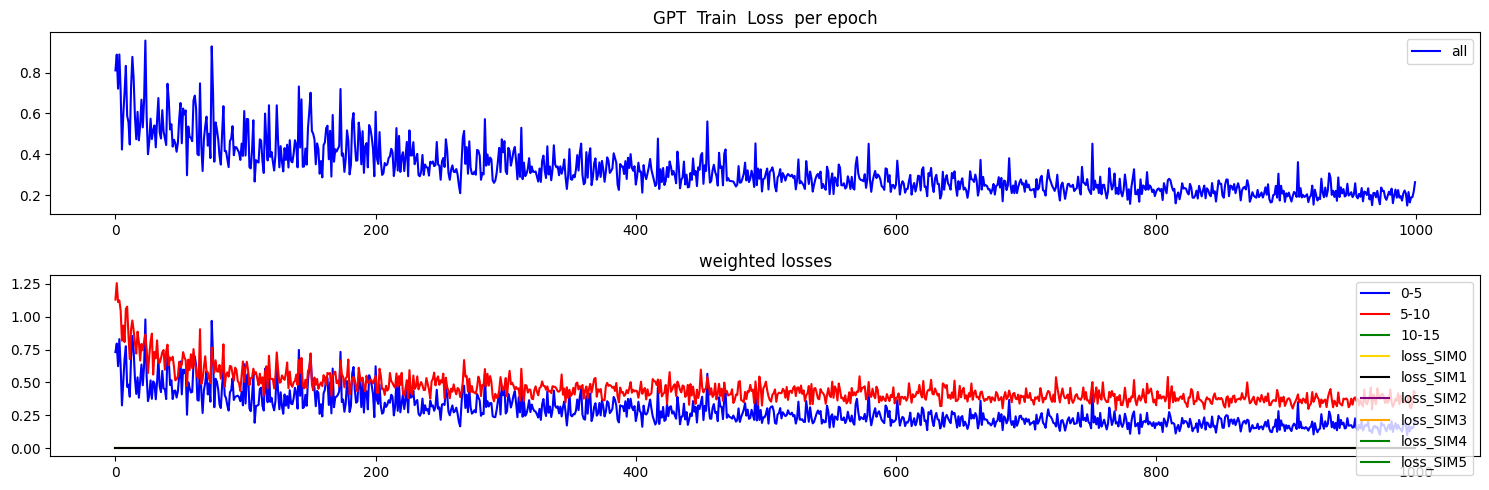

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(19,)
pred_si (1, 9, 1)
(9,)
(19,)
****
(19,)


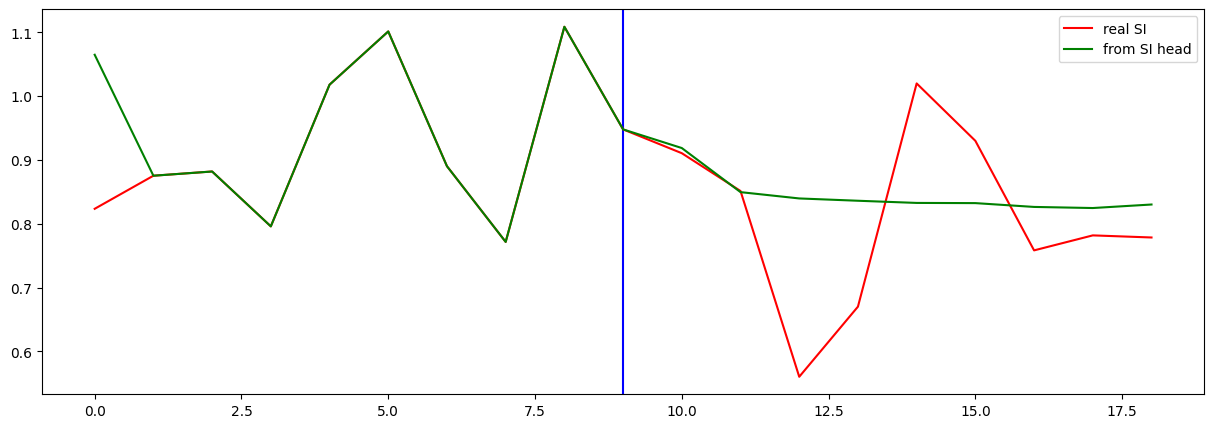

Testing R**2 - (all) - (no inputs):  0.9875442620122225
Testing R**2 - (f2) - SI full (no inputs):  -0.917156966628333
Testing R**2 - SI head only (no inputs):  -0.16978101971868775
0 ...index R**2 (no inputs):  0.08920529309936964
1 ...index R**2 (no inputs):  -0.9700267938939138
2 ...index R**2 (no inputs):  -0.917156966628333
3 ...index R**2 (no inputs):  -0.715732713983104
4 ...index R**2 (no inputs):  0.022985963389569042
5 ...index R**2 (no inputs):  -0.021152513016007735
6 ...index R**2 (no inputs):  -1.047370378505056
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.4260773467497496
10 ...index R**2 (no inputs):  -1.5385822960045354
11 ...index R**2 (no inputs):  -296.75870290039035
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -0.3329801265608574
16 ...index R**2 (no inputs):  -0.00811566320994972
17 ...index R**2 (no inputs):  -13.33143

In [38]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                             chunk000to400_train,
                             reasoning_steps=10,
                             backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk000to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_000to400.append( res_real )
all_pred_si_000to400.append( res_pred )


## Run 4


In [39]:

chunk300to400_train, chunk200to400_train, chunk100to400_train, chunk000to400_train, test_CIVS = tsGPT_obj.random_4_runs()


[0] Train Loss: 0.958420
Loss_SI: 0.9137527942657471 Loss_all: 1.137088656425476
===
[200] Train Loss: 0.166986
Loss_SI: 0.09820880740880966 Loss_all: 0.442094624042511
===
[400] Train Loss: 0.089799
Loss_SI: 0.053694672882556915 Loss_all: 0.2342151254415512
===
[600] Train Loss: 0.054272
Loss_SI: 0.023581326007843018 Loss_all: 0.17703717947006226
===
[800] Train Loss: 0.043124
Loss_SI: 0.019437648355960846 Loss_all: 0.13787169754505157
===


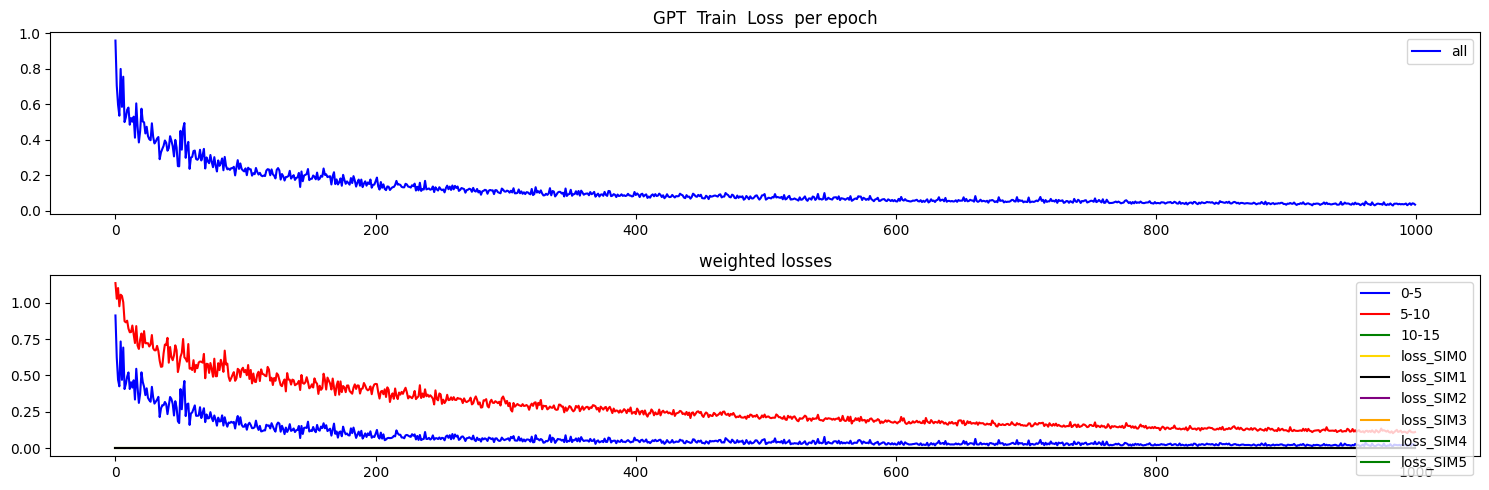

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(19,)
pred_si (1, 9, 1)
(9,)
(19,)
****
(19,)


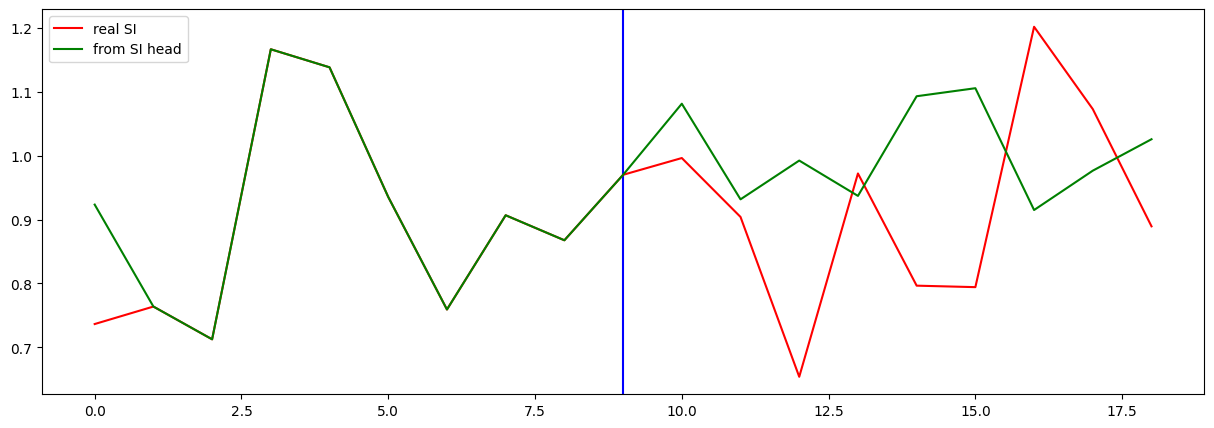

Testing R**2 - (all) - (no inputs):  0.9768561632763186
Testing R**2 - (f2) - SI full (no inputs):  -0.3291414875373846
Testing R**2 - SI head only (no inputs):  -0.4628470076854607
0 ...index R**2 (no inputs):  -0.6498946708006004
1 ...index R**2 (no inputs):  0.03291373512641271
2 ...index R**2 (no inputs):  -0.3291414875373846
3 ...index R**2 (no inputs):  -1.2383973507906716
4 ...index R**2 (no inputs):  -15.743343981161576
5 ...index R**2 (no inputs):  -12.552497489510841
6 ...index R**2 (no inputs):  -2913.18705630736
7 ...index R**2 (no inputs):  -5524270.821645873
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.3570375161531043
10 ...index R**2 (no inputs):  -0.4858745721602793
11 ...index R**2 (no inputs):  -1.0940128525018595
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -6.831024732784507
16 ...index R**2 (no inputs):  -21.262457911951618
17 ...index R**2 (no inputs):

In [40]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                             chunk300to400_train,
                             reasoning_steps=10,
                             backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk300to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )

print( res_real )
print( res_pred )

all_real_si_300to400.append( res_real )
all_pred_si_300to400.append( res_pred )

[0] Train Loss: 0.847930
Loss_SI: 0.7518067359924316 Loss_all: 1.2324225902557373
===
[200] Train Loss: 0.250930
Loss_SI: 0.19209107756614685 Loss_all: 0.48628610372543335
===
[400] Train Loss: 0.131309
Loss_SI: 0.07099923491477966 Loss_all: 0.37254759669303894
===
[600] Train Loss: 0.102330
Loss_SI: 0.05061270669102669 Loss_all: 0.30919724702835083
===
[800] Train Loss: 0.089124
Loss_SI: 0.04629648104310036 Loss_all: 0.2604331076145172
===


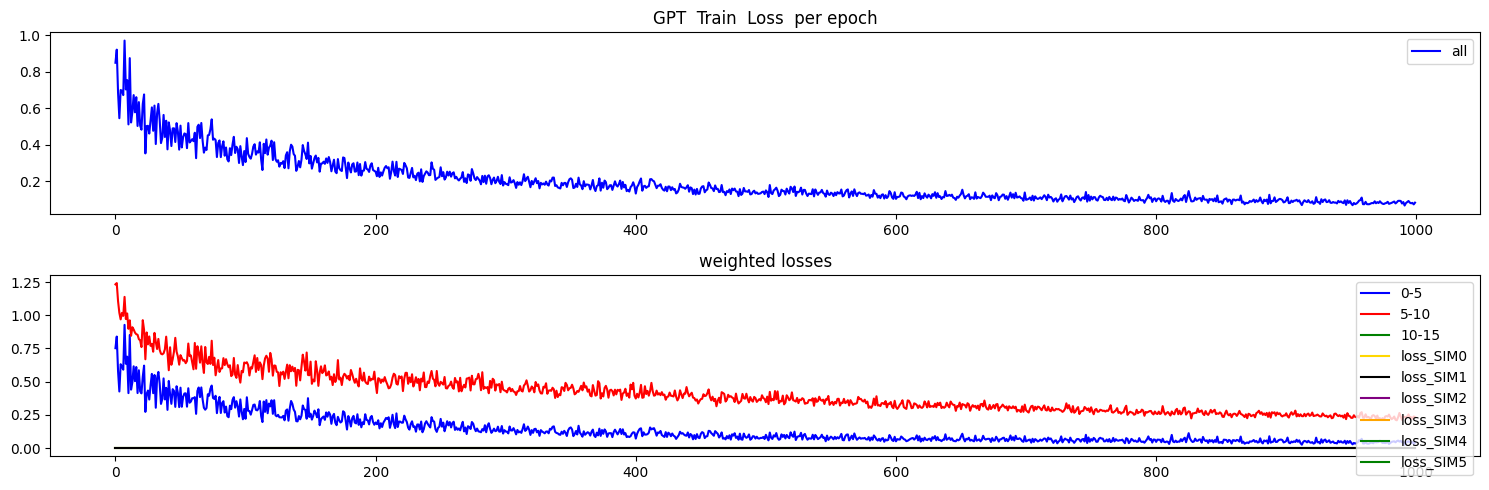

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(19,)
pred_si (1, 9, 1)
(9,)
(19,)
****
(19,)


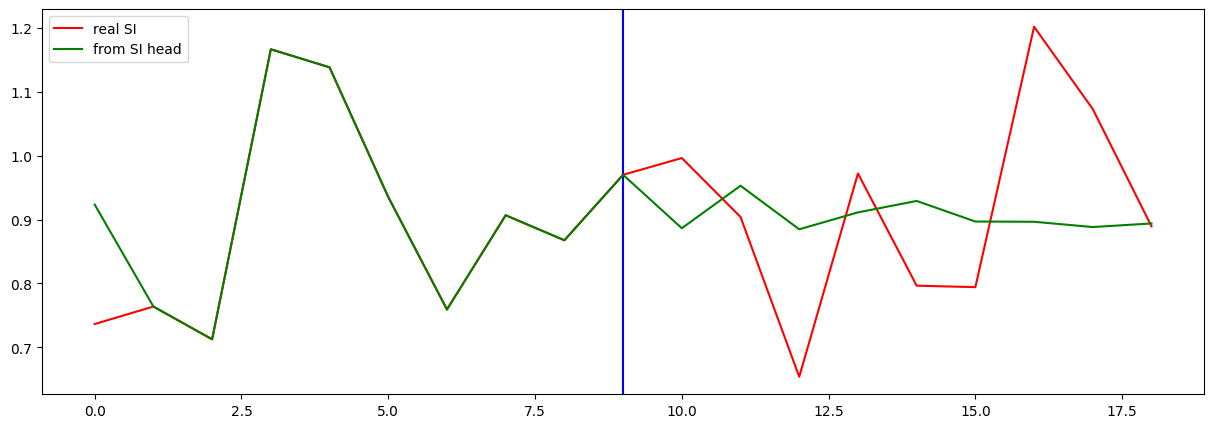

Testing R**2 - (all) - (no inputs):  0.981261572866622
Testing R**2 - (f2) - SI full (no inputs):  -0.41041917998179156
Testing R**2 - SI head only (no inputs):  -0.18206303339488206
0 ...index R**2 (no inputs):  -0.3917468916383471
1 ...index R**2 (no inputs):  -0.0730350774734485
2 ...index R**2 (no inputs):  -0.41041917998179156
3 ...index R**2 (no inputs):  -3.0734153908636843
4 ...index R**2 (no inputs):  -1.2994361093858298
5 ...index R**2 (no inputs):  -9.964585687684735
6 ...index R**2 (no inputs):  -506.4588802437507
7 ...index R**2 (no inputs):  -5555509.092119998
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.46949156174088236
10 ...index R**2 (no inputs):  -0.23782244377822193
11 ...index R**2 (no inputs):  0.06038316664138088
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -1.7514926617429238
16 ...index R**2 (no inputs):  -5.368553042310321
17 ...index R**2 (no inpu

In [41]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                             chunk200to400_train,
                             reasoning_steps=10,
                             backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk200to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_200to400.append( res_real )
all_pred_si_200to400.append( res_pred )

[0] Train Loss: 0.727639
Loss_SI: 0.6132960915565491 Loss_all: 1.1850106716156006
===
[200] Train Loss: 0.425627
Loss_SI: 0.3874474763870239 Loss_all: 0.5783469080924988
===
[400] Train Loss: 0.227192
Loss_SI: 0.17323462665081024 Loss_all: 0.4430224597454071
===
[600] Train Loss: 0.182335
Loss_SI: 0.12655892968177795 Loss_all: 0.40543901920318604
===
[800] Train Loss: 0.204877
Loss_SI: 0.16568981111049652 Loss_all: 0.3616241216659546
===


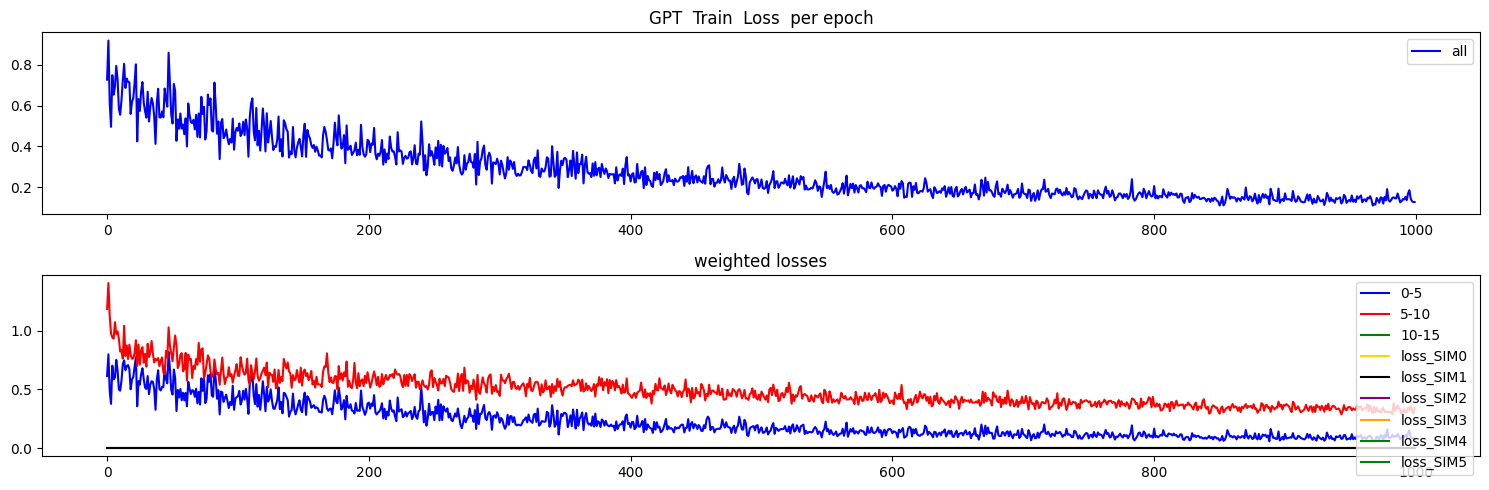

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(19,)
pred_si (1, 9, 1)
(9,)
(19,)
****
(19,)


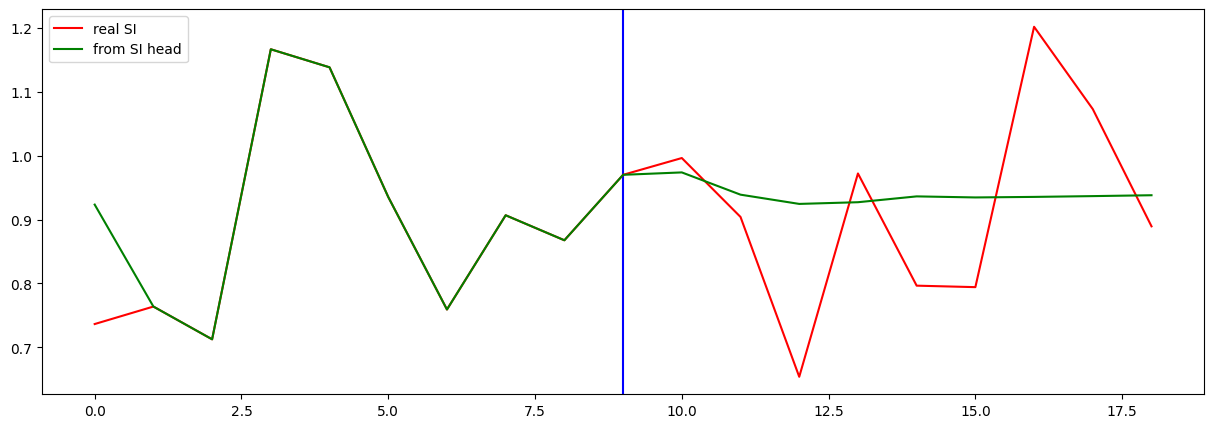

Testing R**2 - (all) - (no inputs):  0.9955091435457634
Testing R**2 - (f2) - SI full (no inputs):  -0.11933138892996897
Testing R**2 - SI head only (no inputs):  -0.10202686637962843
0 ...index R**2 (no inputs):  -0.07347096663630293
1 ...index R**2 (no inputs):  -0.5911744268376422
2 ...index R**2 (no inputs):  -0.11933138892996897
3 ...index R**2 (no inputs):  -2.298496642310049
4 ...index R**2 (no inputs):  -3.390718503693968
5 ...index R**2 (no inputs):  -1.6083915537060904
6 ...index R**2 (no inputs):  -2227.339239842881
7 ...index R**2 (no inputs):  -5571016.637435132
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.018355959316306292
10 ...index R**2 (no inputs):  -0.004519222904807663
11 ...index R**2 (no inputs):  -5.0203966706839225
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -0.07997370612458243
16 ...index R**2 (no inputs):  -0.20854883562089999
17 ...index R**2 (n

In [42]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                              chunk100to400_train,
                              reasoning_steps=10,
                              backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk100to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_100to400.append( res_real )
all_pred_si_100to400.append( res_pred )

[0] Train Loss: 1.037717
Loss_SI: 0.9841740727424622 Loss_all: 1.2518892288208008
===
[200] Train Loss: 0.345146
Loss_SI: 0.28347671031951904 Loss_all: 0.5918227434158325
===
[400] Train Loss: 0.292653
Loss_SI: 0.21772611141204834 Loss_all: 0.5923622250556946
===
[600] Train Loss: 0.253006
Loss_SI: 0.19688737392425537 Loss_all: 0.477481871843338
===
[800] Train Loss: 0.223980
Loss_SI: 0.18216580152511597 Loss_all: 0.3912343978881836
===


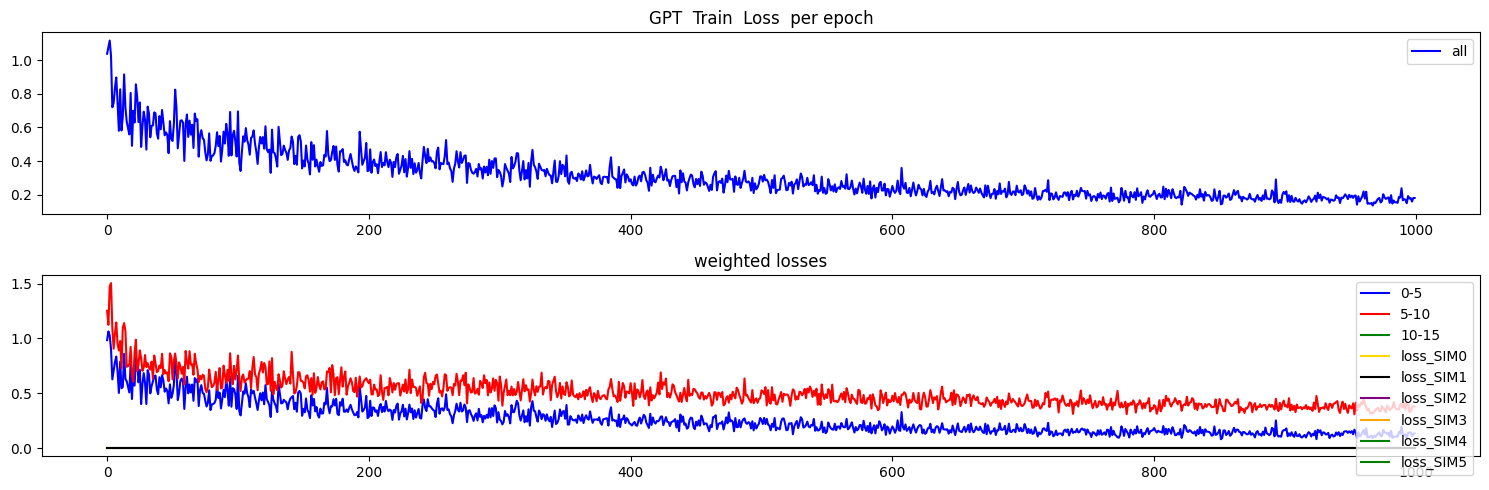

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(19,)
pred_si (1, 9, 1)
(9,)
(19,)
****
(19,)


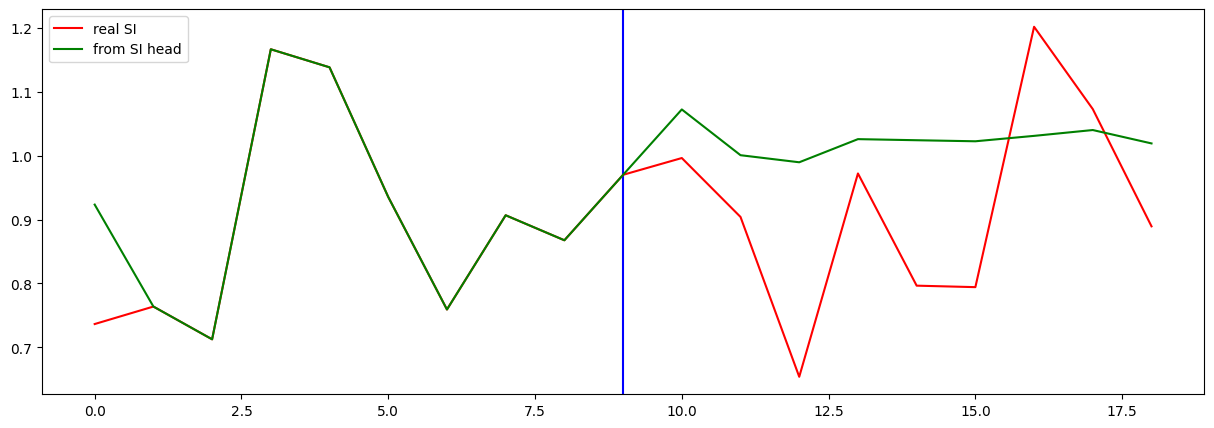

Testing R**2 - (all) - (no inputs):  0.9892523482150005
Testing R**2 - (f2) - SI full (no inputs):  -0.38385905245675533
Testing R**2 - SI head only (no inputs):  -0.6649003065781858
0 ...index R**2 (no inputs):  -0.40739203676311564
1 ...index R**2 (no inputs):  -0.1378002571501944
2 ...index R**2 (no inputs):  -0.38385905245675533
3 ...index R**2 (no inputs):  0.304737997502462
4 ...index R**2 (no inputs):  -11.138679240332934
5 ...index R**2 (no inputs):  -5.245165186002138
6 ...index R**2 (no inputs):  -908.370745098892
7 ...index R**2 (no inputs):  -5829538.531755912
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.5226441390185799
10 ...index R**2 (no inputs):  -0.002633720106109516
11 ...index R**2 (no inputs):  -33.29836366005364
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -0.42376549928642127
16 ...index R**2 (no inputs):  -1.826515954736815
17 ...index R**2 (no inputs

In [43]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                               chunk000to400_train, 
                               reasoning_steps=10,
                               backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk000to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_000to400.append( res_real )
all_pred_si_000to400.append( res_pred )


## Run 5


In [44]:

chunk300to400_train, chunk200to400_train, chunk100to400_train, chunk000to400_train, test_CIVS = tsGPT_obj.random_4_runs()


[0] Train Loss: 0.921384
Loss_SI: 0.8491238355636597 Loss_all: 1.2104239463806152
===
[200] Train Loss: 0.150478
Loss_SI: 0.09821704030036926 Loss_all: 0.35951974987983704
===
[400] Train Loss: 0.083287
Loss_SI: 0.029982589185237885 Loss_all: 0.29650428891181946
===
[600] Train Loss: 0.053958
Loss_SI: 0.018891021609306335 Loss_all: 0.19422487914562225
===
[800] Train Loss: 0.051724
Loss_SI: 0.027008119970560074 Loss_all: 0.15058745443820953
===


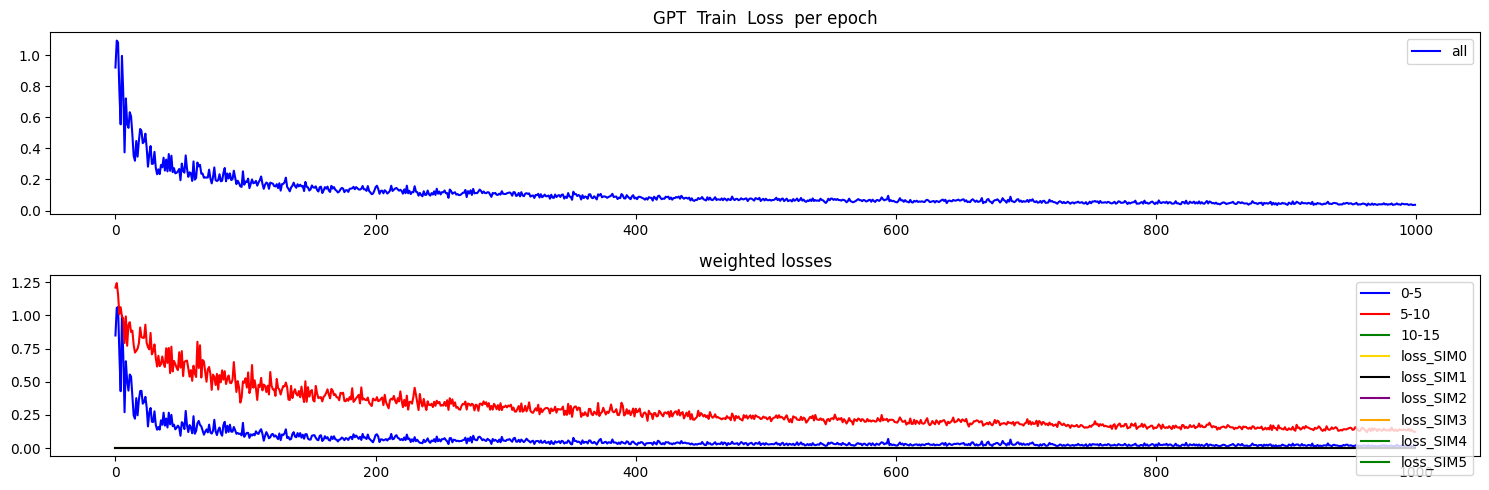

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(19,)
pred_si (1, 9, 1)
(9,)
(19,)
****
(19,)


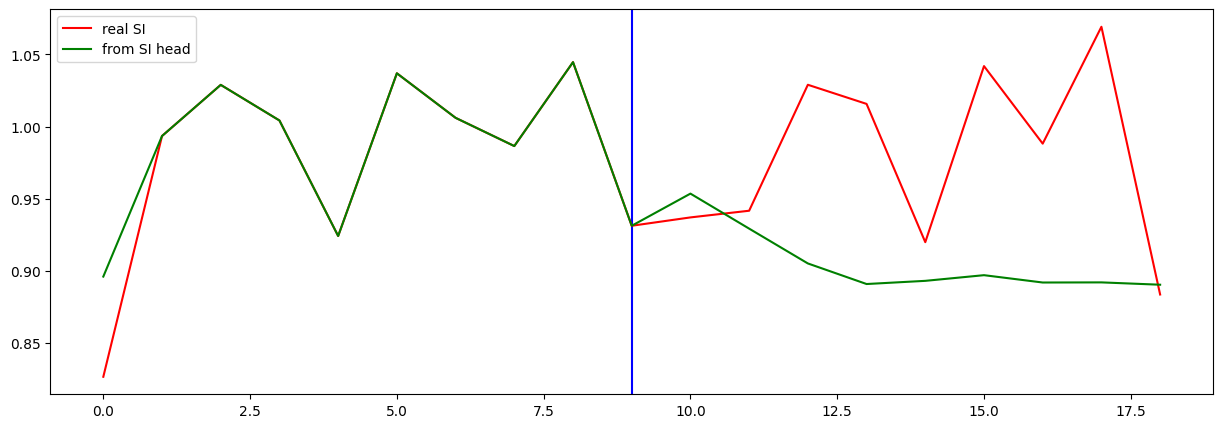

Testing R**2 - (all) - (no inputs):  0.9994060157923692
Testing R**2 - (f2) - SI full (no inputs):  -0.16435851453174455
Testing R**2 - SI head only (no inputs):  -0.707409625218957
0 ...index R**2 (no inputs):  0.045857851157192986
1 ...index R**2 (no inputs):  -0.7294293020657037
2 ...index R**2 (no inputs):  -0.16435851453174455
3 ...index R**2 (no inputs):  -8.536267219240044
4 ...index R**2 (no inputs):  -2.2753202328341158
5 ...index R**2 (no inputs):  -3.9381522314819604
6 ...index R**2 (no inputs):  -940.6708106097925
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  0.02735387150105062
10 ...index R**2 (no inputs):  -1.004875642300889
11 ...index R**2 (no inputs):  0.0
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -5.02480099452535
16 ...index R**2 (no inputs):  -1.3762963749779575
17 ...index R**2 (no inputs):  0.347896546125412
18 ...index

In [45]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                               chunk300to400_train,
                               reasoning_steps=10,
                               backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk300to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )

print( res_real )
print( res_pred )

all_real_si_300to400.append( res_real )
all_pred_si_300to400.append( res_pred )


[0] Train Loss: 0.817305
Loss_SI: 0.708846926689148 Loss_all: 1.2511391639709473
===
[200] Train Loss: 0.158757
Loss_SI: 0.11070940643548965 Loss_all: 0.35094520449638367
===
[400] Train Loss: 0.143802
Loss_SI: 0.07895676046609879 Loss_all: 0.4031851589679718
===
[600] Train Loss: 0.132624
Loss_SI: 0.0854739099740982 Loss_all: 0.32122498750686646
===
[800] Train Loss: 0.100174
Loss_SI: 0.06027710810303688 Loss_all: 0.25975948572158813
===


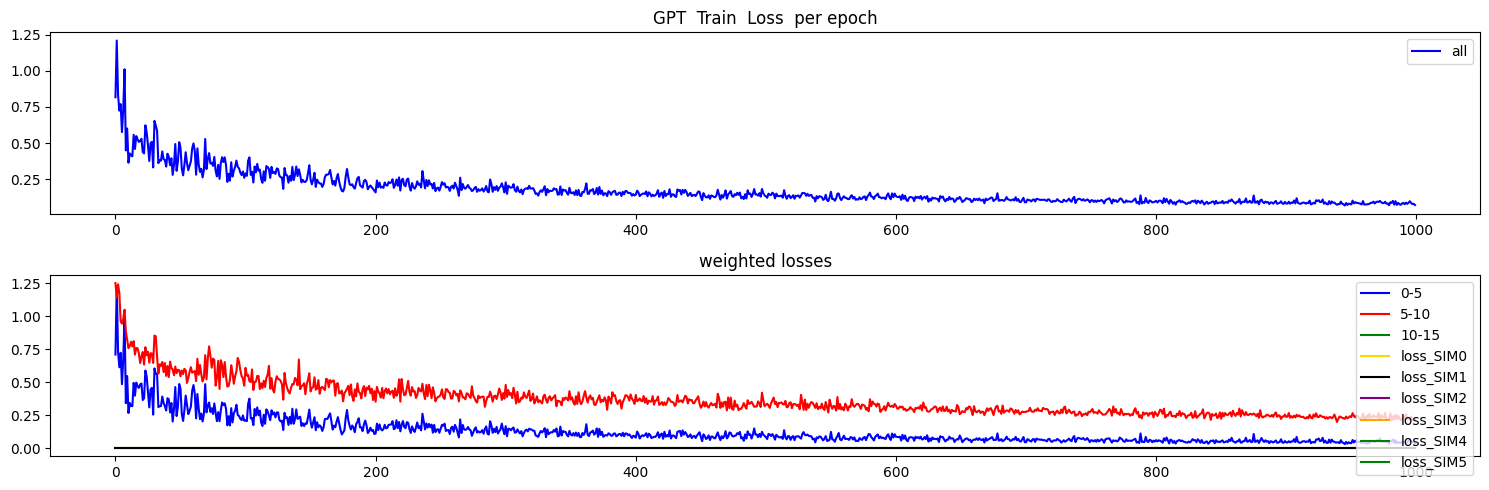

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(19,)
pred_si (1, 9, 1)
(9,)
(19,)
****
(19,)


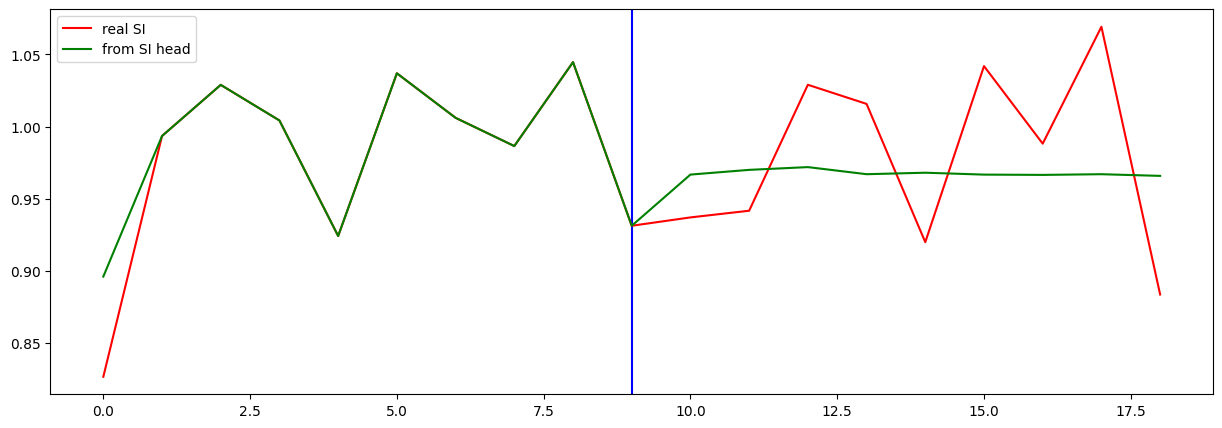

Testing R**2 - (all) - (no inputs):  0.9958064782708606
Testing R**2 - (f2) - SI full (no inputs):  -0.09599510820546642
Testing R**2 - SI head only (no inputs):  0.02261909792778638
0 ...index R**2 (no inputs):  -0.03618922224507548
1 ...index R**2 (no inputs):  -3.2191629713117607
2 ...index R**2 (no inputs):  -0.09599510820546642
3 ...index R**2 (no inputs):  -6.750320878272711
4 ...index R**2 (no inputs):  -0.7863446418474751
5 ...index R**2 (no inputs):  -37.72263349638496
6 ...index R**2 (no inputs):  -424.3340319012442
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.08205758857134726
10 ...index R**2 (no inputs):  -0.13738745989021317
11 ...index R**2 (no inputs):  0.0
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -0.16086881683869292
16 ...index R**2 (no inputs):  -0.27057661581623793
17 ...index R**2 (no inputs):  -36.043461608886716
18

In [46]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                                chunk200to400_train, 
                                reasoning_steps=10,
                                backprop_through_steps=True 
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk200to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_200to400.append( res_real )
all_pred_si_200to400.append( res_pred )


[0] Train Loss: 0.977905
Loss_SI: 0.8699148893356323 Loss_all: 1.409866452217102
===
[200] Train Loss: 0.307499
Loss_SI: 0.25556161999702454 Loss_all: 0.5152496099472046
===
[400] Train Loss: 0.247589
Loss_SI: 0.20092204213142395 Loss_all: 0.4342578947544098
===
[600] Train Loss: 0.162157
Loss_SI: 0.10815756767988205 Loss_all: 0.3781541585922241
===
[800] Train Loss: 0.133846
Loss_SI: 0.07532673329114914 Loss_all: 0.36792489886283875
===


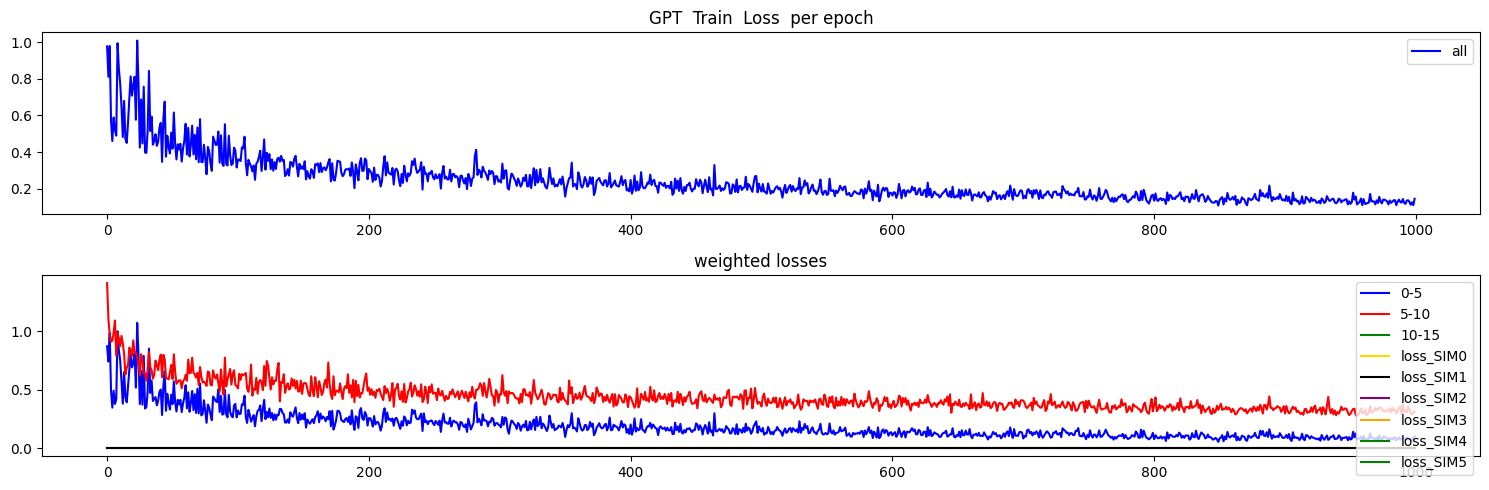

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(19,)
pred_si (1, 9, 1)
(9,)
(19,)
****
(19,)


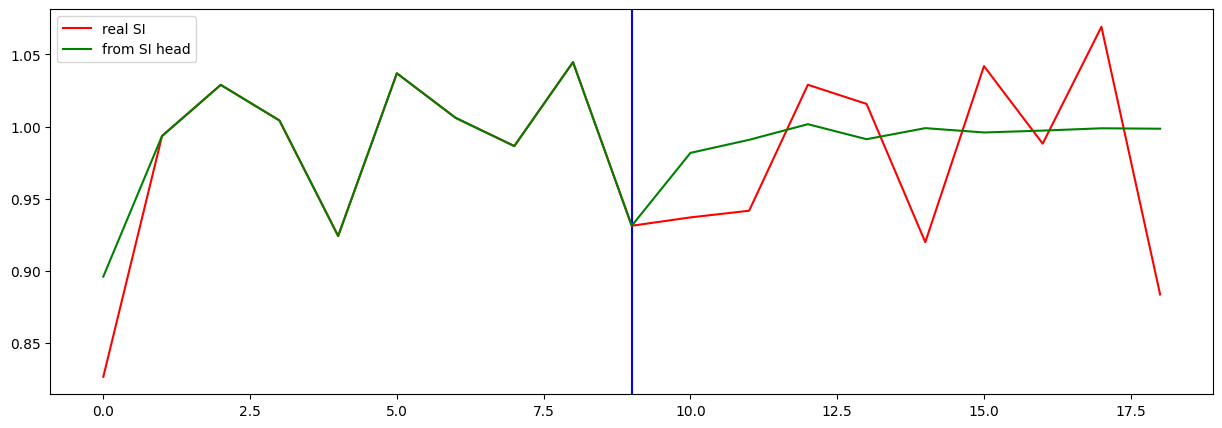

Testing R**2 - (all) - (no inputs):  0.9931832621528504
Testing R**2 - (f2) - SI full (no inputs):  -1.1054881444826483
Testing R**2 - SI head only (no inputs):  -0.11576557445186397
0 ...index R**2 (no inputs):  -0.17701298433749124
1 ...index R**2 (no inputs):  -0.582761413550301
2 ...index R**2 (no inputs):  -1.1054881444826483
3 ...index R**2 (no inputs):  -133.7816553905448
4 ...index R**2 (no inputs):  -0.07168533866749205
5 ...index R**2 (no inputs):  -61.78733376809544
6 ...index R**2 (no inputs):  -92.88961179786574
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.2828472578021861
10 ...index R**2 (no inputs):  -0.10937038382969688
11 ...index R**2 (no inputs):  0.0
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -1.721741625306835
16 ...index R**2 (no inputs):  -0.07653794698994365
17 ...index R**2 (no inputs):  -19.804166920979817
18 ...

In [47]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                                 chunk100to400_train, 
                                 reasoning_steps=10,
                                 backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk100to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )

print( res_real )
print( res_pred )

all_real_si_100to400.append( res_real )
all_pred_si_100to400.append( res_pred )


[0] Train Loss: 0.615651
Loss_SI: 0.4694644510746002 Loss_all: 1.2003964185714722
===
[200] Train Loss: 0.312886
Loss_SI: 0.265861451625824 Loss_all: 0.5009834170341492
===
[400] Train Loss: 0.289268
Loss_SI: 0.2518676519393921 Loss_all: 0.4388689398765564
===
[600] Train Loss: 0.205734
Loss_SI: 0.16269126534461975 Loss_all: 0.37790557742118835
===
[800] Train Loss: 0.169546
Loss_SI: 0.10740820318460464 Loss_all: 0.4180956184864044
===


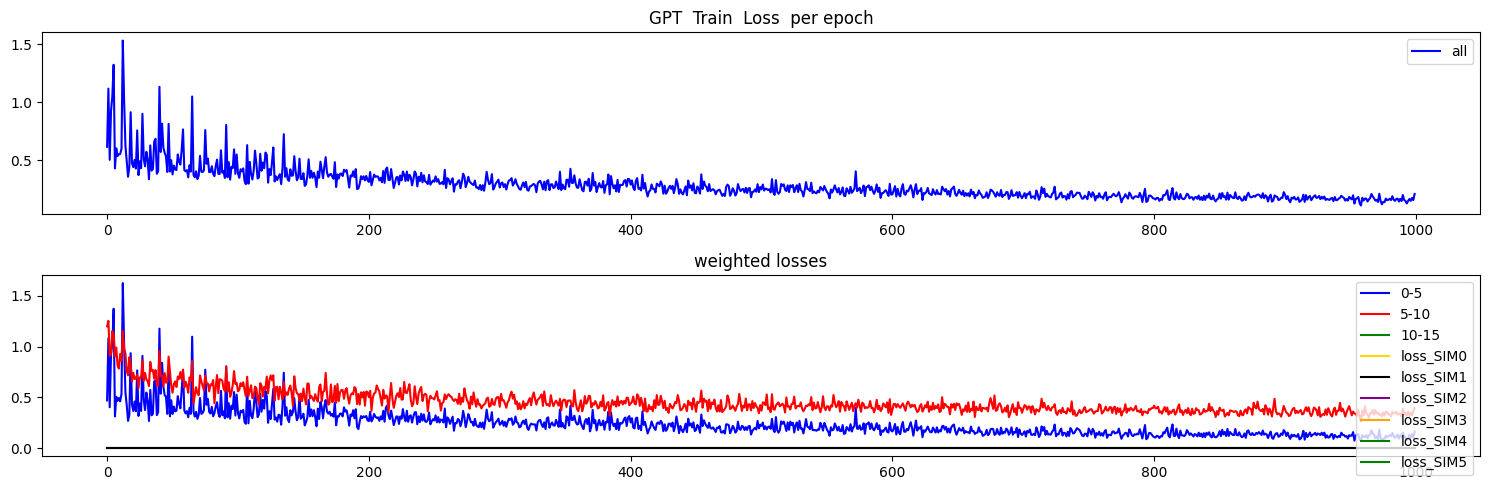

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(19,)
pred_si (1, 9, 1)
(9,)
(19,)
****
(19,)


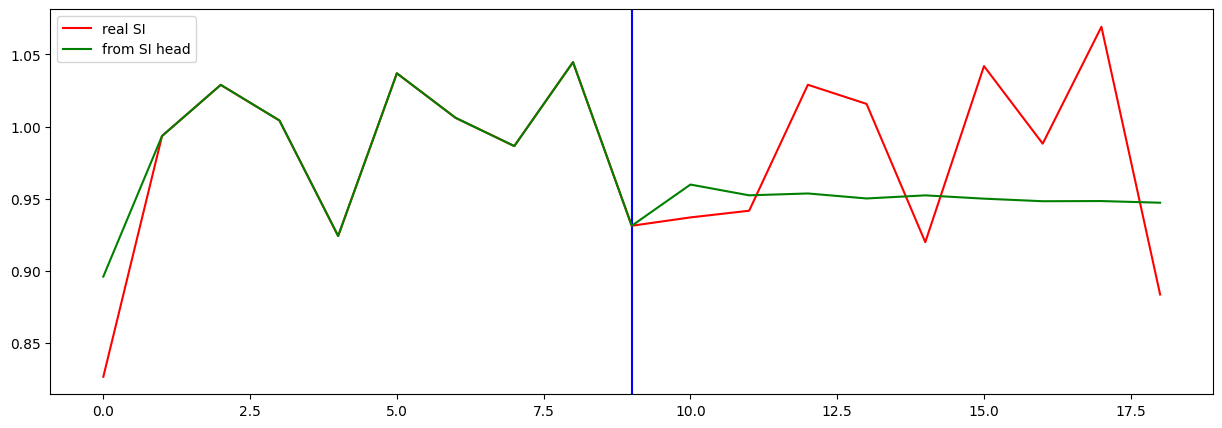

Testing R**2 - (all) - (no inputs):  0.9935007679337188
Testing R**2 - (f2) - SI full (no inputs):  -0.20232352403729403
Testing R**2 - SI head only (no inputs):  -0.03050270497424079
0 ...index R**2 (no inputs):  -0.16308118048474496
1 ...index R**2 (no inputs):  -0.2553407787962647
2 ...index R**2 (no inputs):  -0.20232352403729403
3 ...index R**2 (no inputs):  -16.574890126127723
4 ...index R**2 (no inputs):  -3.706093912852208
5 ...index R**2 (no inputs):  -58.7030439717428
6 ...index R**2 (no inputs):  -5.862417838243644
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.13844967911003225
10 ...index R**2 (no inputs):  -0.31688616129997493
11 ...index R**2 (no inputs):  0.0
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -1.2283264996075642
16 ...index R**2 (no inputs):  -0.11632309710128896
17 ...index R**2 (no inputs):  -475.5808878580729
18 .

In [48]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                                 chunk000to400_train,
                                 reasoning_steps=10,
                                 backprop_through_steps=True
)

res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk000to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, 9 )

print( res_real )
print( res_pred )

all_real_si_000to400.append( res_real )
all_pred_si_000to400.append( res_pred )



## R2 over accumulated Runs


In [49]:

from sklearn.metrics import r2_score


real_si_concat_300to400 = np.concatenate(all_real_si_300to400)
pred_si_concat_300to400 = np.concatenate(all_pred_si_300to400)

real_si_concat_200to400 = np.concatenate(all_real_si_200to400)
pred_si_concat_200to400 = np.concatenate(all_pred_si_200to400)

real_si_concat_100to400 = np.concatenate(all_real_si_100to400)
pred_si_concat_100to400 = np.concatenate(all_pred_si_100to400)

real_si_concat_000to400 = np.concatenate(all_real_si_000to400)
pred_si_concat_000to400 = np.concatenate(all_pred_si_000to400)


In [50]:


r2 = r2_score(real_si_concat_300to400, pred_si_concat_300to400 )

print("Accumulated R² 300to400:", r2)


Accumulated R² 300to400: 0.15973709528089308


In [51]:

r2 = r2_score(real_si_concat_200to400, pred_si_concat_200to400 )

print("Accumulated R² 200to400:", r2)


Accumulated R² 200to400: 0.20224639188986093


In [52]:

r2 = r2_score(real_si_concat_100to400, pred_si_concat_100to400 )

print("Accumulated R² 100to400:", r2)


Accumulated R² 100to400: 0.2333440734264809


In [53]:

r2 = r2_score(real_si_concat_000to400, pred_si_concat_000to400 )

print("Accumulated R² 000to400:", r2)


Accumulated R² 000to400: 0.1964510074725958



## First Few R2


In [54]:

from sklearn.metrics import r2_score
import numpy as np


def print_first_few_R2( real_si_concat, pred_si_concat, THE_FIRST_FEW ):

    first_n = THE_FIRST_FEW

    real = np.array( real_si_concat  )
    pred = np.array( pred_si_concat  )

    real_first4 = []
    pred_first4 = []

    for i in range(0, len(real), 9):
        real_first4.extend(real[i:i+first_n])
        pred_first4.extend(pred[i:i+first_n])

    # Convert to numpy arrays
    real_first4 = np.array(real_first4)
    pred_first4 = np.array(pred_first4)

    # Compute R²
    r2_first4 = r2_score(real_first4, pred_first4)
    print(THE_FIRST_FEW, ".....R² on first n steps:", r2_first4)


In [55]:

print_first_few_R2( real_si_concat_300to400, pred_si_concat_300to400, 1 )
print_first_few_R2( real_si_concat_300to400, pred_si_concat_300to400, 2 )
print_first_few_R2( real_si_concat_300to400, pred_si_concat_300to400, 3 )
print_first_few_R2( real_si_concat_300to400, pred_si_concat_300to400, 4 )
print_first_few_R2( real_si_concat_300to400, pred_si_concat_300to400, 5 )
print_first_few_R2( real_si_concat_300to400, pred_si_concat_300to400, 6 )
print_first_few_R2( real_si_concat_300to400, pred_si_concat_300to400, 7 )
print_first_few_R2( real_si_concat_300to400, pred_si_concat_300to400, 8 )
print_first_few_R2( real_si_concat_300to400, pred_si_concat_300to400, 9 )


1 .....R² on first n steps: 0.47686886773969905
2 .....R² on first n steps: 0.28327656748692764
3 .....R² on first n steps: 0.34407559449823133
4 .....R² on first n steps: 0.317486525050267
5 .....R² on first n steps: 0.23278015392674178
6 .....R² on first n steps: 0.24241748611620328
7 .....R² on first n steps: 0.2067997601194116
8 .....R² on first n steps: 0.18233178235598813
9 .....R² on first n steps: 0.15973709528089308


In [56]:

print_first_few_R2( real_si_concat_200to400, pred_si_concat_200to400, 1 )
print_first_few_R2( real_si_concat_200to400, pred_si_concat_200to400, 2 )
print_first_few_R2( real_si_concat_200to400, pred_si_concat_200to400, 3 )
print_first_few_R2( real_si_concat_200to400, pred_si_concat_200to400, 4 )
print_first_few_R2( real_si_concat_200to400, pred_si_concat_200to400, 5 )
print_first_few_R2( real_si_concat_200to400, pred_si_concat_200to400, 6 )
print_first_few_R2( real_si_concat_200to400, pred_si_concat_200to400, 7 )
print_first_few_R2( real_si_concat_200to400, pred_si_concat_200to400, 8 )
print_first_few_R2( real_si_concat_200to400, pred_si_concat_200to400, 9 )


1 .....R² on first n steps: 0.29546250009868413
2 .....R² on first n steps: 0.1392105045311195
3 .....R² on first n steps: 0.25888046173368295
4 .....R² on first n steps: 0.247095996143036
5 .....R² on first n steps: 0.23257861290429338
6 .....R² on first n steps: 0.205416437024863
7 .....R² on first n steps: 0.1923652625858996
8 .....R² on first n steps: 0.19814657537859948
9 .....R² on first n steps: 0.20224639188986093


In [57]:

print_first_few_R2( real_si_concat_100to400, pred_si_concat_100to400, 1 )
print_first_few_R2( real_si_concat_100to400, pred_si_concat_100to400, 2 )
print_first_few_R2( real_si_concat_100to400, pred_si_concat_100to400, 3 )
print_first_few_R2( real_si_concat_100to400, pred_si_concat_100to400, 4 )
print_first_few_R2( real_si_concat_100to400, pred_si_concat_100to400, 5 )
print_first_few_R2( real_si_concat_100to400, pred_si_concat_100to400, 6 )
print_first_few_R2( real_si_concat_100to400, pred_si_concat_100to400, 7 )
print_first_few_R2( real_si_concat_100to400, pred_si_concat_100to400, 8 )
print_first_few_R2( real_si_concat_100to400, pred_si_concat_100to400, 9 )



1 .....R² on first n steps: 0.3283984590359893
2 .....R² on first n steps: 0.19141946563572942
3 .....R² on first n steps: 0.2996523436606232
4 .....R² on first n steps: 0.29694864256598263
5 .....R² on first n steps: 0.269947985527753
6 .....R² on first n steps: 0.2577796684446708
7 .....R² on first n steps: 0.24817100220405353
8 .....R² on first n steps: 0.23991872092947253
9 .....R² on first n steps: 0.2333440734264809


In [58]:

print_first_few_R2( real_si_concat_000to400, pred_si_concat_000to400, 1 )
print_first_few_R2( real_si_concat_000to400, pred_si_concat_000to400, 2 )
print_first_few_R2( real_si_concat_000to400, pred_si_concat_000to400, 3 )
print_first_few_R2( real_si_concat_000to400, pred_si_concat_000to400, 4 )
print_first_few_R2( real_si_concat_000to400, pred_si_concat_000to400, 5 )
print_first_few_R2( real_si_concat_000to400, pred_si_concat_000to400, 6 )
print_first_few_R2( real_si_concat_000to400, pred_si_concat_000to400, 7 )
print_first_few_R2( real_si_concat_000to400, pred_si_concat_000to400, 8 )
print_first_few_R2( real_si_concat_000to400, pred_si_concat_000to400, 9 )


1 .....R² on first n steps: 0.476530581733696
2 .....R² on first n steps: 0.33060977490371146
3 .....R² on first n steps: 0.3317770050658213
4 .....R² on first n steps: 0.24643273825813639
5 .....R² on first n steps: 0.18668645469371736
6 .....R² on first n steps: 0.2021850223045859
7 .....R² on first n steps: 0.20916199128325985
8 .....R² on first n steps: 0.20878069919415476
9 .....R² on first n steps: 0.1964510074725958



## Plot


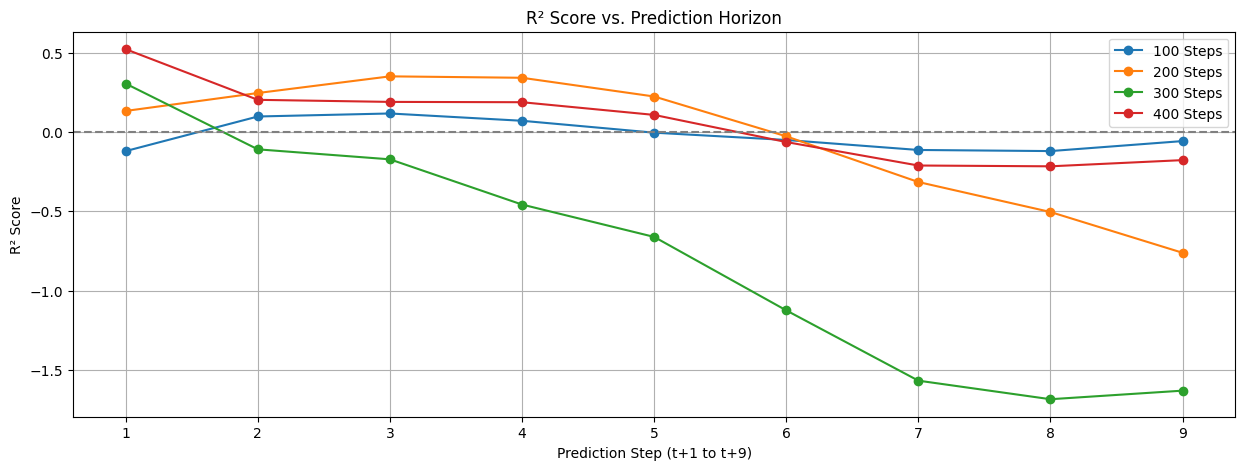

In [59]:

import matplotlib.pyplot as plt

def plot_r2_curves():
    steps = list(range(1, 10))

    r2_100 = [-0.121, 0.097, 0.116, 0.070, -0.005, -0.051, -0.114, -0.121, -0.058]
    r2_200 = [0.132, 0.245, 0.350, 0.341, 0.223, -0.028, -0.316, -0.505, -0.762]
    r2_300 = [0.304, -0.110, -0.173, -0.458, -0.662, -1.125, -1.568, -1.685, -1.631]
    r2_400 = [0.521, 0.202, 0.189, 0.187, 0.107, -0.064, -0.212, -0.217, -0.178]

    plt.plot(steps, r2_100, marker='o', label='100 Steps')
    plt.plot(steps, r2_200, marker='o', label='200 Steps')
    plt.plot(steps, r2_300, marker='o', label='300 Steps')
    plt.plot(steps, r2_400, marker='o', label='400 Steps')

    plt.title("R² Score vs. Prediction Horizon")
    plt.xlabel("Prediction Step (t+1 to t+9)")
    plt.ylabel("R² Score")
    plt.legend()
    plt.grid(True)
    plt.axhline(0, color='gray', linestyle='--')
    plt.show()


plot_r2_curves()
    
